In [1]:
from itertools import combinations, permutations
import time
import numpy as np
import random
import math
import itertools
import os
import sys
from skhep.math.vectors import LorentzVector

from lhereader import LHEReader


def smear(particle, PID):
    if(PID=="quark"):
        E, px, py, pz = particle.e, particle.px, particle.py, particle.pz
        sigma = 0.1
        new_E = np.random.normal(E, E*sigma)
        ratio = new_E/E
        new_px, new_py, new_pz = px*ratio, py*ratio, pz*ratio
        new_particle = LorentzVector()
        new_particle.setpxpypze(new_px, new_py, new_pz, new_E)
        #if(new_E<=0):
        #    new_particle.setpxpypze(0, 0, 0, 0)
    #else:
     #   new_particle = particle

    return new_particle

In [2]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])

In [3]:
e_total = 1000

In [8]:
ww = np.loadtxt('/Users/morgancassidy/ww_sm_parton_1tev')
ww_smear = np.loadtxt('/Users/morgancassidy/ww_sm_smear_1tev')

ttbbvv = np.loadtxt('/Users/morgancassidy/ttbbvv_sm_parton_1tev.txt')
ttbbvv_smear = np.loadtxt('/Users/morgancassidy/ttbbvv_sm_smear_1tev.txt')

ttza = np.loadtxt('/Users/morgancassidy/ttza_sm_parton_1tev')
ttza_smear = np.loadtxt('/Users/morgancassidy/ttza_sm_smear_1tev')

gbb = np.loadtxt('/Users/morgancassidy/gbb_sm_parton_10tev')
gbb_smear = np.loadtxt('/Users/morgancassidy/gbb_sm_smear_1tev')

#--------------------------------

tthvv = np.loadtxt('/Users/morgancassidy/tthvv_cpv_3_parton_10tev.txt')
tthvv_smear = np.loadtxt('/Users/morgancassidy/tthvv_cpv_3_smear_10tev.txt')

tbhmv = np.loadtxt('/Users/morgancassidy/tbhmv5_cpv_3_parton_10tev.txt')
tbhmv_smear = np.loadtxt('/Users/morgancassidy/tbhmv5_cpv_3_smear_10tev.txt')

tth = np.loadtxt('/Users/morgancassidy/tth_cpv_3_parton_10tev.txt')
tth_smear = np.loadtxt('/Users/morgancassidy/tth_cpv_3_smear_10tev.txt')

In [9]:
b1_e, b1_px, b1_py, b1_pz = 0, 1, 2, 3
b2_e, b2_px, b2_py, b2_pz = 4, 5, 6, 7
b3_e, b3_px, b3_py, b3_pz = 8, 9, 10, 11
b4_e, b4_px, b4_py, b4_pz = 12, 13, 14, 15
j1_e, j1_px, j1_py, j1_pz = 16, 17, 18, 19
j2_e, j2_px, j2_py, j2_pz = 20, 21, 22, 23
l1_e, l1_px, l1_py, l1_pz = 24, 25, 26, 27

In [10]:
signals = [tth, tthvv, tbhmv, gbb, ttza, ttbbvv, ww]

In [45]:
signals = [tth_smear, tthvv_smear, tbhmv_smear, gbb_smear, ttza_smear, ttbbvv_smear, ww_smear]

In [11]:
def invariant_mass(m1, m2, e1, px1, py1, pz1, e2, px2, py2, pz2):
    pdot = px1*px2 + py1*py2 + pz1*pz2
    mass =np.sqrt(m1**2 + m2**2 + 2*(e1*e2 - pdot))
    return mass

In [12]:
def pt(px, py):
    momentum = np.sqrt(px**2 + py**2)
    return momentum

def pt2(px1, py1, px2, py2):
    momentum = np.sqrt((px1+px2)**2 + (py1+py2)**2)
    return momentum

In [13]:
def eta(e, pz):
    pseudorap = 0.5*np.log((e + pz)/(e - pz))
    return pseudorap

def eta2(e1, pz1, e2, pz2):
    eta_2 = 0.5*np.log(((e1+e2) + (pz1+pz2))/((e1+e2) - (pz1+pz2)))
    return eta_2

In [14]:
def phi(px1, py1, px2, py2):
    cos_phi = (px1*px2 + py1*py2)/np.sqrt((px1**2 + py1**2)*(px2**2+py2**2))
    delphi = math.acos(cos_phi)
    return delphi

In [15]:
def deltaR(phi, eta):
    delR = np.sqrt(phi**2 + eta**2)
    return delR

In [46]:
#reconstruct higgs
higgs_tth = []
higgs_tthvv = []
higgs_tbhmv = []
higgs_gbb = []
higgs_ttza = []
higgs_ttbbvv = []
higgs_ww = []

for j in range(0, len(signals)):
    for i in range(0, len(signals[j])):
        higgs_e = signals[j][i][b3_e] + signals[j][i][b4_e]
        higgs_px = signals[j][i][b3_px] + signals[j][i][b4_px]
        higgs_py = signals[j][i][b3_py] + signals[j][i][b4_py]
        higgs_pz =signals[j][i][b3_pz] + signals[j][i][b4_pz]
        higgs = np.array([higgs_e, higgs_px, higgs_py, higgs_pz])
        if j == 0:
            higgs_tth.append(higgs)
        elif j ==1:
            higgs_tthvv.append(higgs)
        elif j == 2:
            higgs_tbhmv.append(higgs)
        elif j == 3:
            higgs_gbb.append(higgs)
        elif j == 4:
            higgs_ttza.append(higgs)            
        elif j == 5:
            higgs_ttbbvv.append(higgs)            
        elif j == 6:
            higgs_ww.append(higgs)  
            
higgs = [higgs_tth, higgs_tthvv, higgs_tbhmv, higgs_gbb, higgs_ttza, higgs_ttbbvv, higgs_ww]

In [47]:
#reconstruct w
w_tth = []
w_tthvv = []
w_tbhmv = []
w_gbb = []
w_ttza = []
w_ttbbvv = []
w_ww = []

for j in range(0, len(signals)):
    for i in range(0, len(signals[j])):
        w_e = signals[j][i][j1_e] + signals[j][i][j2_e]
        w_px = signals[j][i][j1_px] + signals[j][i][j2_px]
        w_py = signals[j][i][j1_py] + signals[j][i][j2_py]
        w_pz =signals[j][i][j1_pz] + signals[j][i][j2_pz]
        w = np.array([w_e, w_px, w_py, w_pz])
        if j == 0:
            w_tth.append(w)
        elif j ==1:
            w_tthvv.append(w)
        elif j == 2:
            w_tbhmv.append(w)
        elif j == 3:
            w_gbb.append(w)
        elif j == 4:
            w_ttza.append(w)            
        elif j == 5:
            w_ttbbvv.append(w)            
        elif j == 6:
            w_ww.append(w)
            
w = [w_tth, w_tthvv, w_tbhmv, w_gbb, w_ttza, w_ttbbvv, w_ww]

In [48]:
#reconsrtucted top
t_tth = []
t_tthvv = []
t_tbhmv = []
t_gbb = []
t_ttza = []
t_ttbbvv = []
t_ww = []

for j in range(0, len(signals)):
    for i in range(0, len(signals[j])):
        t_e = signals[j][i][b1_e] + w[j][i][0]
        t_px = signals[j][i][b1_px] + w[j][i][1]
        t_py = signals[j][i][b1_py] + w[j][i][2]
        t_pz =signals[j][i][b1_pz] + w[j][i][3]
        t = np.array([t_e, t_px, t_py, t_pz])
        if j == 0:
            t_tth.append(t)
        elif j ==1:
            t_tthvv.append(t)
        elif j == 2:
            t_tbhmv.append(t)
        elif j == 3:
            t_gbb.append(t)
        elif j == 4:
            t_ttza.append(t)            
        elif j == 5:
            t_ttbbvv.append(t)            
        elif j == 6:
            t_ww.append(t)

t = [t_tth, t_tthvv, t_tbhmv, t_gbb, t_ttza, t_ttbbvv, t_ww]

In [49]:
#visible Energy

e_vis_tth = []
e_vis_tthvv = []
e_vis_tbhmv = []
e_vis_gbb = []
e_vis_ttza = []
e_vis_ttbbvv = []
e_vis_ww = []

for j in range (0, len(signals)):
    for i in range(0, len(signals[j])):
        e_vis = signals[j][i][b1_e]+signals[j][i][b2_e]+signals[j][i][b3_e]+signals[j][i][b4_e]+signals[j][i][j1_e]+signals[j][i][j2_e]+signals[j][i][l1_e]
        if j == 0:
            e_vis_tth.append(e_vis)
        elif j == 1:
            e_vis_tthvv.append(e_vis)
        elif j == 2:
            e_vis_tbhmv.append(e_vis)
        elif j == 3:
            e_vis_gbb.append(e_vis)
        elif j == 4:
            e_vis_ttza.append(e_vis)
        elif j == 5:
            e_vis_ttbbvv.append(e_vis)
        elif j == 6:
            e_vis_ww.append(e_vis)
            


In [50]:
#Missing Energy
e_visible = [e_vis_tth, e_vis_tthvv, e_vis_tbhmv, e_vis_gbb, e_vis_ttza, e_vis_ttbbvv, e_vis_ww]

e_miss_tth = []
e_miss_tthvv = []
e_miss_tbhmv = []
e_miss_gbb = []
e_miss_ttza = []
e_miss_ttbbvv = []
e_miss_ww = []

for j in range (0, len(e_visible)):
    for i in range(0, len(e_visible[j])):
        e_miss = e_total - e_visible[j][i]
        if j == 0:
            e_miss_tth.append(e_miss)
        elif j == 1:
            e_miss_tthvv.append(e_miss)
        elif j == 2:
            e_miss_tbhmv.append(e_miss)
        elif j == 3:
            e_miss_gbb.append(e_miss)
        elif j == 4:
            e_miss_ttza.append(e_miss)
        elif j == 5:
            e_miss_ttbbvv.append(e_miss)
        elif j == 6:
            e_miss_ww.append(e_miss)

In [51]:
#total momentum
px_tth, py_tth, pz_tth = [] , [] , []
px_tthvv, py_tthvv, pz_tthvv = [] , [] , []
px_tbhmv, py_tbhmv, pz_tbhmv = [] , [] , []
px_gbb, py_gbb, pz_gbb = [] , [] , []
px_ttza, py_ttza, pz_ttza = [] , [] , []
px_ttbbvv, py_ttbbvv, pz_ttbbvv = [] , [] , []
px_ww, py_ww, pz_ww = [] , [] , []


for j in range (0, len(signals)):
    for i in range (0, len(signals[j])):
        px = signals[j][i][b1_px] + signals[j][i][b2_px] + signals[j][i][b3_px] + signals[j][i][b4_px] + signals[j][i][j1_px] + signals[j][i][j2_px] + signals[j][i][l1_px]
        py = signals[j][i][b1_py] + signals[j][i][b2_py] + signals[j][i][b3_py] + signals[j][i][b4_py] + signals[j][i][j1_py] + signals[j][i][j2_py] + signals[j][i][l1_py]
        pz = signals[j][i][b1_pz] + signals[j][i][b2_pz] + signals[j][i][b3_pz] + signals[j][i][b4_pz] + signals[j][i][j1_pz] + signals[j][i][j2_pz] + signals[j][i][l1_pz]
        if j == 0:
            px_tth.append(px)
            py_tth.append(py)
            pz_tth.append(pz)
        elif j == 1:
            px_tthvv.append(px)
            py_tthvv.append(py)
            pz_tthvv.append(pz)
        elif j ==2:
            px_tbhmv.append(px)
            py_tbhmv.append(py)
            pz_tbhmv.append(pz)
        elif j ==3:
            px_gbb.append(px)
            py_gbb.append(py)
            pz_gbb.append(pz)
        elif j ==4:
            px_ttza.append(px)
            py_ttza.append(py)
            pz_ttza.append(pz)
        elif j ==5:
            px_ttbbvv.append(px)
            py_ttbbvv.append(py)
            pz_ttbbvv.append(pz)
        elif j ==6:
            px_ww.append(px)
            py_ww.append(py)
            pz_ww.append(pz)
      

In [52]:
#Total transverse momentum (missing)
p_x = [px_tth, px_tthvv, px_tbhmv, px_gbb, px_ttza, px_ttbbvv, px_ww]
p_y = [py_tth, py_tthvv, py_tbhmv, py_gbb, py_ttza, py_ttbbvv, py_ww]

pt_total_tth = []
pt_total_tthvv = []
pt_total_tbhmv = []
pt_total_gbb = []
pt_total_ttza = []
pt_total_ttbbvv = []
pt_total_ww = []

for j in range (0, len(p_x)):
    for i in range (0, len(p_x[j])):
        mmtm = pt(p_x[j][i], p_y[j][i])
        if j == 0:
            pt_total_tth.append(mmtm)
        elif j == 1:
            pt_total_tthvv.append(mmtm)
        elif j ==2:
            pt_total_tbhmv.append(mmtm)
        elif j ==3:
            pt_total_gbb.append(mmtm)
        elif j ==4:
            pt_total_ttza.append(mmtm)
        elif j ==5:
            pt_total_ttbbvv.append(mmtm)
        elif j ==6:
            pt_total_ww.append(mmtm)     
            
pt_total_miss = [pt_total_tth, pt_total_tthvv, pt_total_tbhmv, pt_total_gbb, pt_total_ttza, pt_total_ttbbvv, pt_total_ww]

In [53]:
#Missing mass
p_x = [px_tth, px_tthvv, px_tbhmv, px_gbb, px_ttza, px_ttbbvv, px_ww]
p_y = [py_tth, py_tthvv, py_tbhmv, py_gbb, py_ttza, py_ttbbvv, py_ww]
p_z = [pz_tth, pz_tthvv, pz_tbhmv, pz_gbb, pz_ttza, pz_ttbbvv, pz_ww]
e_miss = [e_miss_tth, e_miss_tthvv, e_miss_tbhmv, e_miss_gbb, e_miss_ttza, e_miss_ttbbvv, e_miss_ww]

m_miss_total_tth = []
m_miss_total_tthvv = []
m_miss_total_tbhmv = []
m_miss_total_gbb = []
m_miss_total_ww = []
m_miss_total_ttbbvv = []
m_miss_total_ttza = []

for j in range (0, len(p_x)):
    for i in range (0, len(p_x[j])):
        #mass = e_miss[j][i]**2 - (p_x[j][i]**2 + p_y[j][i]**2 + p_z[j][i]**2)
        mass = e_miss[j][i]**2 - (p_x[j][i] + p_y[j][i] + p_z[j][i])**2
        if mass < 0:
            missing_mass = 0
        else:
            missing_mass = np.sqrt(mass)

        if j == 0:
            m_miss_total_tth.append(missing_mass)
        elif j == 1:
            m_miss_total_tthvv.append(missing_mass)
        elif j ==2:
            m_miss_total_tbhmv.append(missing_mass)
        elif j ==3:
            m_miss_total_gbb.append(missing_mass)
        elif j ==4:
            m_miss_total_ttza.append(missing_mass)
        elif j ==5:
            m_miss_total_ttbbvv.append(missing_mass)
        elif j ==6:
            m_miss_total_ww.append(missing_mass) 

In [54]:
#rap calc b3b4
eta_bb_tth, eta_b_tth, eta_bbar_tth = [], [], []
eta_bb_tthvv, eta_b_tthvv, eta_bbar_tthvv = [], [], []
eta_bb_tbhmv, eta_b_tbhmv, eta_bbar_tbhmv = [], [], []
eta_bb_gbb, eta_b_gbb, eta_bbar_gbb = [], [], []
eta_bb_ttza, eta_b_ttza, eta_bbar_ttza = [], [], []
eta_bb_ttbbvv, eta_b_ttbbvv, eta_bbar_ttbbvv = [], [], []
eta_bb_ww, eta_b_ww, eta_bbar_ww = [], [], []

for j in range (0, len(signals)):
    for i in range(0, len(signals[j])):
        eta1 = eta(signals[j][i][b3_e], signals[j][i][b3_pz])
        eta2 = eta(signals[j][i][b4_e], signals[j][i][b4_pz])
        del_eta = eta2-eta1
        if j == 0:
            eta_bb_tth.append(del_eta)
            eta_b_tth.append(eta1)
            eta_bbar_tth.append(eta2)
        elif j == 1:
            eta_bb_tthvv.append(del_eta)
            eta_b_tthvv.append(eta1)
            eta_bbar_tthvv.append(eta2)            
        elif j == 2:
            eta_bb_tbhmv.append(del_eta)
            eta_b_tbhmv.append(eta1)
            eta_bbar_tbhmv.append(eta2)
        elif j == 3:
            eta_bb_gbb.append(del_eta)
            eta_b_gbb.append(eta1)
            eta_bbar_gbb.append(eta2)
        elif j == 4:
            eta_bb_ttza.append(del_eta)
            eta_b_ttza.append(eta1)
            eta_bbar_ttza.append(eta2)
        elif j == 5:
            eta_bb_ttbbvv.append(del_eta)
            eta_b_ttbbvv.append(eta1)
            eta_bbar_ttbbvv.append(eta2)
        elif j == 6:
            eta_bb_ww.append(del_eta)
            eta_b_ww.append(eta1)
            eta_bbar_ww.append(eta2) 

In [55]:
#delta phi between bottom quarks from higgs

phibb_tth = []
phibb_tthvv = []
phibb_tbhmv = []
phibb_gbb = []
phibb_ttbbvv = []
phibb_ww = []
phibb_ttza = []

for j in range (0, len(signals)):
    for i in range(0, len(signals[j])):
        del_phi1 = phi(signals[j][i][b3_px], signals[j][i][b3_py], signals[j][i][b4_px], signals[j][i][b4_py])
        if j == 0:
            phibb_tth.append(del_phi1)
        elif j == 1:
            phibb_tthvv.append(del_phi1)           
        elif j == 2:
            phibb_tbhmv.append(del_phi1)
        elif j == 3:
            phibb_gbb.append(del_phi1)
        elif j == 4:
            phibb_ttza.append(del_phi1)
        elif j == 5:
            phibb_ttbbvv.append(del_phi1)
        elif j == 6:
            phibb_ww.append(del_phi1)

In [56]:
#Delta R for b3 and b4
etabb = [eta_bb_tth, eta_bb_tthvv, eta_bb_tbhmv, eta_bb_gbb, eta_bb_ttza, eta_bb_ttbbvv, eta_bb_ww]
phibb = [phibb_tth, phibb_tthvv, phibb_tbhmv, phibb_gbb, phibb_ttza, phibb_ttbbvv, phibb_ww]

DelR_bb_tth = []
DelR_bb_tthvv = []
DelR_bb_tbhmv = []

DelR_bb_gbb = []
DelR_bb_ww = []
DelR_bb_ttbbvv = []
DelR_bb_ttza = []

for j in range (0, len(etabb)):
    for i in range(0, len(etabb[j])):
        delR = deltaR(etabb[j][i], phibb[j][i])
        #delR = np.sqrt(etabb[j][i]**2 + phibb[j][i]**2)
        
        if j == 0:
            DelR_bb_tth.append(delR)
        elif j == 1:
            DelR_bb_tthvv.append(delR)
        elif j ==2:
            DelR_bb_tbhmv.append(delR)
        elif j ==3:
            DelR_bb_gbb.append(delR)
        elif j ==4:
            DelR_bb_ttza.append(delR)
        elif j ==5:
            DelR_bb_ttbbvv.append(delR)
        elif j ==6:
            DelR_bb_ww.append(delR)

In [57]:
#Transverse Momentum Bottom from Higgs

pt_b3_tth = []
pt_b3_tthvv = []
pt_b3_tbhmv = []
pt_b3_gbb = []
pt_b3_ttza = []
pt_b3_ttbbvv = []
pt_b3_ww = []

for j in range(0, len(signals)):
    for i in range(0, len(signals[j])): 
        mmtm = pt(signals[j][i][b3_px], signals[j][i][b3_py])
        if j == 0:
            pt_b3_tth.append(mmtm)
        elif j == 1:
            pt_b3_tthvv.append(mmtm)            
        elif j == 2:
            pt_b3_tbhmv.append(mmtm)
        elif j == 3:
            pt_b3_gbb.append(mmtm)
        elif j == 4:
            pt_b3_ttza.append(mmtm)
        elif j == 5:
            pt_b3_ttbbvv.append(mmtm)
        elif j == 6:
            pt_b3_ww.append(mmtm)     

In [58]:
#Transverse Momentum Higgs

pt_b3b4_tth = []
pt_b3b4_tthvv = []
pt_b3b4_tbhmv = []
pt_b3b4_gbb = []
pt_b3b4_ttza = []
pt_b3b4_ttbbvv = []
pt_b3b4_ww = []

for j in range(0, len(signals)):
    for i in range(0, len(signals[j])): 
        mmtm = pt2(signals[j][i][b3_px], signals[j][i][b3_py], signals[j][i][b4_px], signals[j][i][b4_py])
        if j == 0:
            pt_b3b4_tth.append(mmtm)
        elif j == 1:
            pt_b3b4_tthvv.append(mmtm)            
        elif j == 2:
            pt_b3b4_tbhmv.append(mmtm)
        elif j == 3:
            pt_b3b4_gbb.append(mmtm)
        elif j == 4:
            pt_b3b4_ttza.append(mmtm)
        elif j == 5:
            pt_b3b4_ttbbvv.append(mmtm)
        elif j == 6:
            pt_b3b4_ww.append(mmtm)

In [59]:
#mass higgs

m_b3b4_tth = []
m_b3b4_tthvv = []
m_b3b4_tbhmv = []
m_b3b4_gbb = []
m_b3b4_ttza = []
m_b3b4_ttbbvv = []
m_b3b4_ww = []

for j in range( 0, len(signals)):
    for i in range(0, len(signals[j])):
        m_bb = invariant_mass(4.7, 4.7, signals[j][i][b3_e], signals[j][i][b3_px], signals[j][i][b3_py], 
                              signals[j][i][b3_pz], signals[j][i][b4_e], signals[j][i][b4_px], signals[j][i][b4_py], 
                              signals[j][i][b4_pz])
        if j == 0:
            m_b3b4_tth.append(m_bb)
        elif j == 1:
            m_b3b4_tthvv.append(m_bb)
        elif j == 2:
            m_b3b4_tbhmv.append(m_bb)
        elif j == 3:
            m_b3b4_gbb.append(m_bb)
        elif j == 4:
            m_b3b4_ttza.append(m_bb)
        elif j == 5:
            m_b3b4_ttbbvv.append(m_bb)
        elif j == 6:
            m_b3b4_ww.append(m_bb)
    

In [60]:
#rap calc b3b4 + l
eta_hl_tth, eta_h_tth, eta_l_tth = [], [], []
eta_hl_tbhmv, eta_h_tbhmv, eta_l_tbhmv = [], [], []
eta_hl_tthvv, eta_h_tthvv, eta_l_tthvv = [], [], []
eta_hl_gbb, eta_h_gbb, eta_l_gbb = [], [], []
eta_hl_ww, eta_h_ww, eta_l_ww = [], [], []
eta_hl_ttza, eta_h_ttza, eta_l_ttza = [], [], []
eta_hl_ttbbvv, eta_h_ttbbvv, eta_l_ttbbvv = [], [], []

for j in range (0, len(signals)):
    for i in range(0, len(signals[j])):
        eta1 = eta(higgs[j][i][0], higgs[j][i][3])
        eta2 = eta(signals[j][i][l1_e], signals[j][i][l1_pz])
        del_eta = eta2-eta1
        if j == 0:
            eta_hl_tth.append(del_eta)
            eta_l_tth.append(eta2)
            eta_h_tth.append(eta1)
        elif j == 1:
            eta_hl_tthvv.append(del_eta)  
            eta_l_tthvv.append(eta2)
            eta_h_tthvv.append(eta1)
        elif j == 2:
            eta_hl_tbhmv.append(del_eta)
            eta_l_tbhmv.append(eta2)
            eta_h_tbhmv.append(eta1)
        elif j == 3:
            eta_hl_gbb.append(del_eta)
            eta_l_gbb.append(eta2)
            eta_h_gbb.append(eta1)
        elif j == 4:
            eta_hl_ttza.append(del_eta)
            eta_l_ttza.append(eta2)
            eta_h_ttza.append(eta1)
        elif j == 5:
            eta_hl_ttbbvv.append(del_eta)
            eta_l_ttbbvv.append(eta2)
            eta_h_ttbbvv.append(eta1)
        elif j == 6:
            eta_hl_ww.append(del_eta)
            eta_l_ww.append(eta2)
            eta_h_ww.append(eta1)

In [61]:
#delta phi higgs and lepton
phib3b4l_tth = []
phib3b4l_tthvv = []
phib3b4l_tbhmv = []
phib3b4l_gbb = []
phib3b4l_ww = []
phib3b4l_ttbbvv = []
phib3b4l_ttza = []

for j in range (0, len(signals)):
    for i in range(0, len(signals[j])):
        del_phi1 = phi(higgs[j][i][1], higgs[j][i][2], signals[j][i][l1_px], signals[j][i][l1_py])
        if j ==0:
            phib3b4l_tth.append(del_phi1)
        elif j == 1:
            phib3b4l_tthvv.append(del_phi1)
        elif j == 2:
            phib3b4l_tbhmv.append(del_phi1)  
        elif j == 3:
            phib3b4l_gbb.append(del_phi1)            
        elif j == 4:
            phib3b4l_ttza.append(del_phi1)            
        elif j == 5:
            phib3b4l_ttbbvv.append(del_phi1)
        elif j == 6:
            phib3b4l_ww.append(del_phi1)

In [62]:
#Delta R higgs and lepton
etahl = [eta_hl_tth, eta_hl_tthvv, eta_hl_tbhmv, eta_hl_gbb, eta_hl_ttza, eta_hl_ttbbvv, eta_hl_ww]
phihl = [phib3b4l_tth, phib3b4l_tthvv, phib3b4l_tbhmv, phib3b4l_gbb, phib3b4l_ttza, phib3b4l_ttbbvv, phib3b4l_ww]

DelR_hl_tth = []
DelR_hl_tthvv = []
DelR_hl_tbhmv = []

DelR_hl_gbb = []
DelR_hl_ww = []
DelR_hl_ttbbvv = []
DelR_hl_ttza = []

for j in range (0, len(etahl)):
    for i in range(0, len(etahl[j])):
        delR = deltaR(etahl[j][i], phihl[j][i])
        
        if j == 0:
            DelR_hl_tth.append(delR)
        elif j == 1:
            DelR_hl_tthvv.append(delR)
        elif j ==2:
            DelR_hl_tbhmv.append(delR)
        elif j ==3:
            DelR_hl_gbb.append(delR)
        elif j ==4:
            DelR_hl_ttza.append(delR)
        elif j ==5:
            DelR_hl_ttbbvv.append(delR)
        elif j ==6:
            DelR_hl_ww.append(delR)


In [63]:
######## NEW HISTOGRAMS ###########

In [64]:
#pT all jets

pt_jet_sum_tth = []
pt_jet_sum_tthvv = []
pt_jet_sum_tbhmv = []
pt_jet_sum_gbb = []
pt_jet_sum_ttza = []
pt_jet_sum_ttbbvv = []
pt_jet_sum_ww = []

for j in range (0, len(signals)):
    for i in range(0, len(signals[j])):
        ptb1 = pt(signals[j][i][b1_px], signals[j][i][b1_py])
        ptb2 = pt(signals[j][i][b2_px], signals[j][i][b2_py])
        ptb3 = pt(signals[j][i][b3_px], signals[j][i][b3_py])
        ptb4 = pt(signals[j][i][b4_px], signals[j][i][b4_py])
        ptj1 = pt(signals[j][i][j1_px], signals[j][i][j1_py])
        ptj2 = pt(signals[j][i][j2_px], signals[j][i][j2_py])
        jet_sum = ptb1 + ptb2 + ptb3 + ptb4 + ptj1 + ptj2
        if j == 0:
            pt_jet_sum_tth.append(jet_sum)
        elif j == 1:
            pt_jet_sum_tthvv.append(jet_sum)
        elif j == 2:
            pt_jet_sum_tbhmv.append(jet_sum)
        elif j == 3:
            pt_jet_sum_gbb.append(jet_sum)
        elif j == 4:
            pt_jet_sum_ttza.append(jet_sum)
        elif j == 5:
            pt_jet_sum_ttbbvv.append(jet_sum)
        elif j == 6:
            pt_jet_sum_ww.append(jet_sum)
            
pt_jet_sum = [pt_jet_sum_tth, pt_jet_sum_tthvv, pt_jet_sum_tbhmv, pt_jet_sum_gbb, 
              pt_jet_sum_ttza, pt_jet_sum_ttbbvv, pt_jet_sum_ww]

In [65]:
#pT 6jets + 1lept

pt_lept_jet_tth = []
pt_lept_jet_tthvv = []
pt_lept_jet_tbhmv = []
pt_lept_jet_gbb = []
pt_lept_jet_ttza = []
pt_lept_jet_ttbbvv = []
pt_lept_jet_ww = []

for j in range (0, len(signals)):
    for i in range(0, len(signals[j])):
        ptl = pt(signals[j][i][l1_px], signals[j][i][l1_py])
        lept_jet = ptl + pt_jet_sum[j][i]
        if j == 0:
            pt_lept_jet_tth.append(lept_jet)
        elif j == 1:
            pt_lept_jet_tthvv.append(lept_jet)
        elif j == 2:
            pt_lept_jet_tbhmv.append(lept_jet)
        elif j == 3:
            pt_lept_jet_gbb.append(lept_jet)
        elif j == 4:
            pt_lept_jet_ttza.append(lept_jet)
        elif j == 5:
            pt_lept_jet_ttbbvv.append(lept_jet)
        elif j == 6:
            pt_lept_jet_ww.append(lept_jet)
            
pt_lept_jet = [pt_lept_jet_tth, pt_lept_jet_tthvv, pt_lept_jet_tbhmv, pt_lept_jet_gbb, 
               pt_lept_jet_ttza, pt_lept_jet_ttbbvv, pt_lept_jet_ww]    

In [66]:
m_eff_tth = []
m_eff_tthvv = []
m_eff_tbhmv = []
m_eff_gbb = []
m_eff_ttza = []
m_eff_ttbbvv = []
m_eff_ww = []

for j in range (0, len(signals)):
    for i in range(0, len(signals[j])):
        effective_mass = pt_lept_jet[j][i] + pt_total_miss[j][i]
        if j == 0:
            m_eff_tth.append(effective_mass)
        elif j == 1:
            m_eff_tthvv.append(effective_mass)
        elif j == 2:
            m_eff_tbhmv.append(effective_mass)
        elif j == 3:
            m_eff_gbb.append(effective_mass)
        elif j == 4:
            m_eff_ttza.append(effective_mass)
        elif j == 5:
            m_eff_ttbbvv.append(effective_mass)
        elif j == 6:
            m_eff_ww.append(effective_mass)

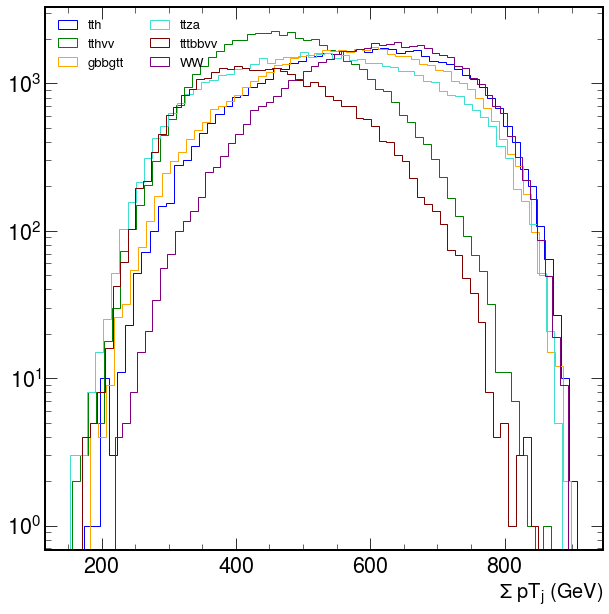

In [67]:
## PT JET SUM (Ht)

bins = 60
plt.hist(pt_jet_sum_tth, bins = bins, alpha = 1, histtype='step', color = 'blue', label='tth')
plt.hist(pt_jet_sum_tthvv, bins = bins, alpha = 1, histtype='step', color = 'green', label='tthvv')
#plt.hist(pt_jet_sum_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbhmv')
plt.hist(pt_jet_sum_gbb, bins = bins, alpha = 1, histtype='step', label='gbbgtt', color = 'orange')
plt.hist(pt_jet_sum_ttza, bins = bins, alpha = 1, histtype='step', label='ttza', color = 'turquoise')
plt.hist(pt_jet_sum_ttbbvv, bins = bins, alpha = 1, histtype='step', label='tttbbvv', color = 'maroon')
plt.hist(pt_jet_sum_ww, bins = bins, alpha = 1, histtype='step', color = 'purple', label='WW')

#plt.xlim(0,500)
plt.legend(loc = 2, prop = {"size": 13}, ncol = 2)
#plt.title(r'$\sqrt{s}t_ = 30 TeV$')
plt.yscale('log')
plt.xlabel(r'$\Sigma$ $pT_{j}$ (GeV)', fontsize = 20)
plt.show()

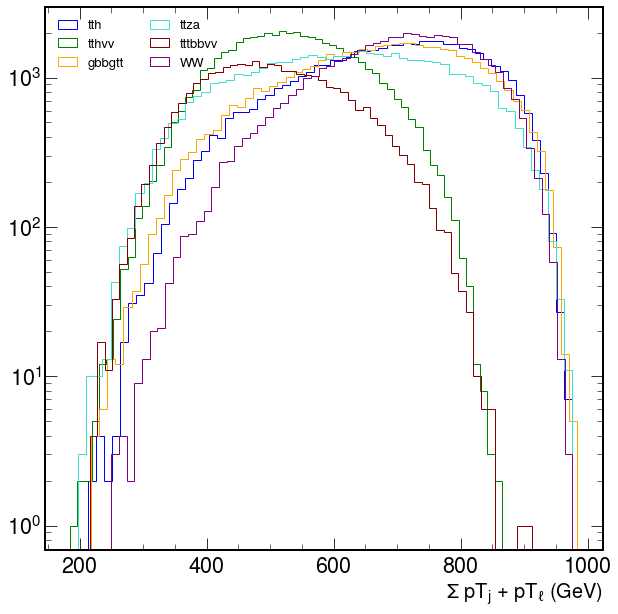

In [41]:
### PT JET + LEPT (Ht^l)
bins = 60
plt.hist(pt_lept_jet_tth, bins = bins, alpha = 1, histtype='step', color = 'blue', label='tth')
plt.hist(pt_lept_jet_tthvv, bins = bins, alpha = 1, histtype='step', color = 'green', label='tthvv')
#plt.hist(pt_lept_jet_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbhmv')
plt.hist(pt_lept_jet_gbb, bins = bins, alpha = 1, histtype='step', label='gbbgtt', color = 'orange')
plt.hist(pt_lept_jet_ttza, bins = bins, alpha = 1, histtype='step', label='ttza', color = 'turquoise')
plt.hist(pt_lept_jet_ttbbvv, bins = bins, alpha = 1, histtype='step', label='tttbbvv', color = 'maroon')
plt.hist(pt_lept_jet_ww, bins = bins, alpha = 1, histtype='step', color = 'purple', label='WW')

#plt.xlim(0,500)
plt.legend(loc = 2, prop = {"size": 13}, ncol = 2)
#plt.title(r'$\sqrt{s}t_ = 30 TeV$')
plt.yscale('log')
plt.xlabel(r'$\Sigma$ $pT_{j}$ + $pT_{\ell}$ (GeV)', fontsize = 20)
plt.show()

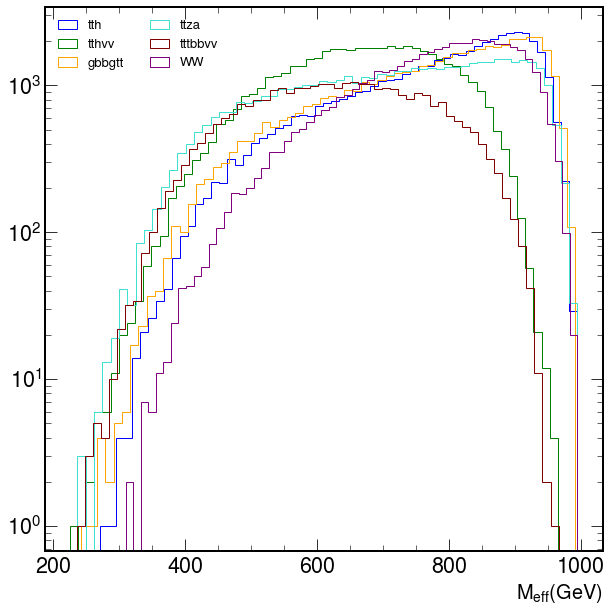

In [42]:
### PT JET
bins = 60
plt.hist(m_eff_tth, bins = bins, alpha = 1, histtype='step', color = 'blue', label='tth')
plt.hist(m_eff_tthvv, bins = bins, alpha = 1, histtype='step', color = 'green', label='tthvv')
#plt.hist(m_eff_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbhmv')
plt.hist(m_eff_gbb, bins = bins, alpha = 1, histtype='step', label='gbbgtt', color = 'orange')
plt.hist(m_eff_ttza, bins = bins, alpha = 1, histtype='step', label='ttza', color = 'turquoise')
plt.hist(m_eff_ttbbvv, bins = bins, alpha = 1, histtype='step', label='tttbbvv', color = 'maroon')
plt.hist(m_eff_ww, bins = bins, alpha = 1, histtype='step', color = 'purple', label='WW')

#plt.xlim(0,500)
plt.legend(loc = 2, prop = {"size": 13}, ncol = 2)
#plt.title(r'$\sqrt{s}t_ = 30 TeV$')
plt.yscale('log')
plt.xlabel(r'$M_{eff}$(GeV)', fontsize = 20)
plt.show()

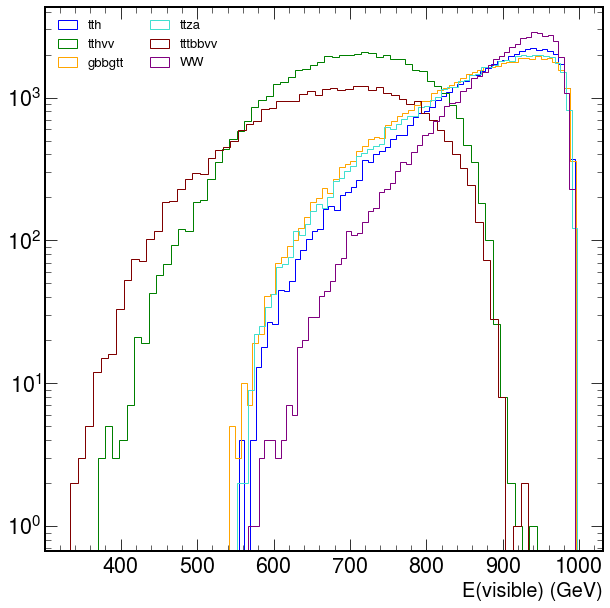

In [43]:
#bins = np.linspace(0, 10000, 60)
bins = 60
plt.hist(e_vis_tth, bins = bins, alpha = 1, histtype='step', color = 'blue', label='tth')
plt.hist(e_vis_tthvv, bins = bins, alpha = 1, histtype='step', color = 'green', label='tthvv')
#plt.hist(e_vis_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbhmv')
plt.hist(e_vis_gbb, bins = bins, alpha = 1, histtype='step', label='gbbgtt', color = 'orange')
plt.hist(e_vis_ttza, bins = bins, alpha = 1, histtype='step', label='ttza', color = 'turquoise')
plt.hist(e_vis_ttbbvv, bins = bins, alpha = 1, histtype='step', label='tttbbvv', color = 'maroon')
plt.hist(e_vis_ww, bins = bins, alpha = 1, histtype='step', color = 'purple', label='WW')

#plt.xlim(0,500)
plt.legend(loc = 2, prop = {"size": 13}, ncol = 2)
#plt.title(r'$\sqrt{s} = 10 TeV$')
plt.yscale('log')
plt.xlabel(r'E(visible) (GeV)', fontsize = 20)
plt.show()

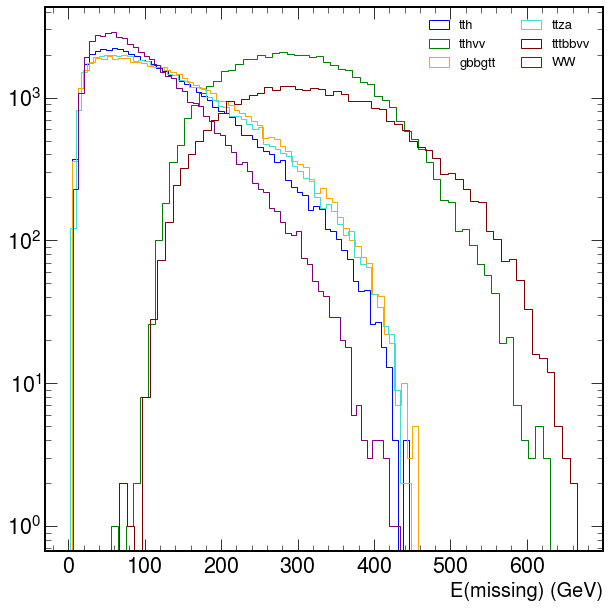

In [44]:
#bins = np.linspace(0, 10000, 60)
plt.hist(e_miss_tth, bins = bins, alpha = 1, histtype='step', color = 'blue', label='tth')
plt.hist(e_miss_tthvv, bins = bins, alpha = 1, histtype='step', color = 'green', label='tthvv')
#plt.hist(e_miss_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbhmv')
plt.hist(e_miss_gbb, bins = bins, alpha = 1, histtype='step', label='gbbgtt',  color = 'orange')
plt.hist(e_miss_ttza, bins = bins, alpha = 1, histtype='step', label='ttza', color = 'turquoise')
plt.hist(e_miss_ttbbvv, bins = bins, alpha = 1, histtype='step', label='tttbbvv', color = 'maroon')
plt.hist(e_miss_ww, bins = bins, alpha = 1, histtype='step', color = 'purple', label='WW')

#plt.xlim(0,500)
plt.legend(loc = 1, prop = {"size": 13}, ncol = 2)
#plt.title(r'$\sqrt{s} = 10 TeV$')
plt.yscale('log')
plt.xlabel(r'E(missing) (GeV)', fontsize = 20)
plt.show()

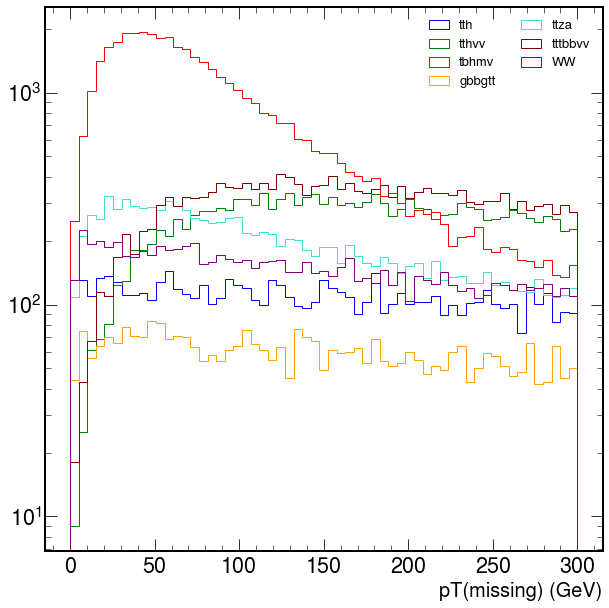

In [36]:
bins =np.linspace(0, 300, 60)
plt.hist(pt_total_tth, bins = bins, alpha = 1, histtype='step', color = 'blue', label='tth')
plt.hist(pt_total_tthvv, bins = bins, alpha = 1, histtype='step', color = 'green', label='tthvv')
plt.hist(pt_total_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbhmv')
plt.hist(pt_total_gbb, bins = bins, alpha = 1, histtype='step', label='gbbgtt',color = 'orange')
plt.hist(pt_total_ttza, bins = bins, alpha = 1, histtype='step', label='ttza', color = 'turquoise')
plt.hist(pt_total_ttbbvv, bins = bins, alpha = 1, histtype='step', label='tttbbvv', color = 'maroon')
plt.hist(pt_total_ww, bins = bins, alpha = 1, histtype='step', color = 'purple', label='WW')

#plt.xlim(0,200)
plt.legend(loc = 1, prop = {"size": 13}, ncol = 2)
#plt.title(r'$\sqrt{s} = 10 TeV$')
plt.yscale('log')
plt.xlabel(r'pT(missing) (GeV)', fontsize = 20)
plt.show()

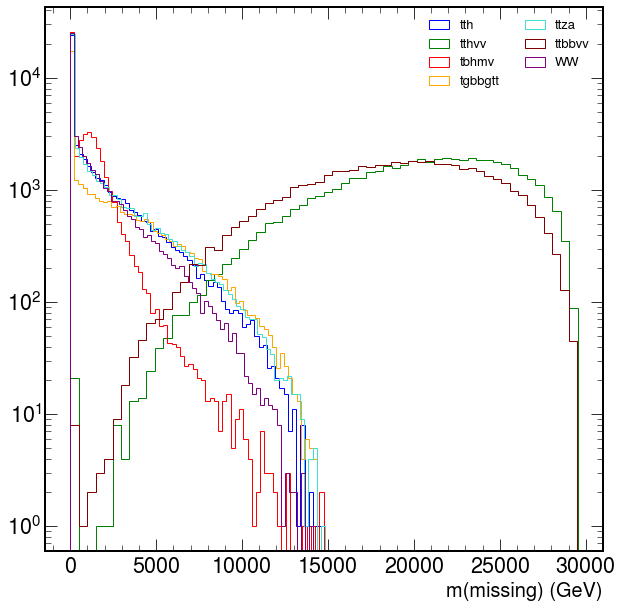

In [33]:
#bins = np.linspace(0, 10000, 60)
plt.hist(m_miss_total_tth, bins = bins, alpha = 1, histtype='step', color = 'blue', label='tth')
plt.hist(m_miss_total_tthvv, bins = bins, alpha = 1, histtype='step', color = 'green', label='tthvv')
plt.hist(m_miss_total_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbhmv')
plt.hist(m_miss_total_gbb, bins = bins, alpha = 1, histtype='step', label='tgbbgtt', color = 'orange')
plt.hist(m_miss_total_ttza, bins = bins, alpha = 1, histtype='step', label='ttza', color = 'turquoise')
plt.hist(m_miss_total_ttbbvv, bins = bins, alpha = 1, histtype='step', color = 'maroon', label='ttbbvv')
plt.hist(m_miss_total_ww, bins = bins, alpha = 1, histtype='step', color = 'purple', label='WW')

#plt.xlim(0,500)
plt.legend(loc = 1, prop = {"size": 13}, ncol = 2)
#plt.title(r'$\sqrt{s} = 10 TeV$')
plt.yscale('log')
plt.xlabel(r'm(missing) (GeV)', fontsize = 20)
plt.show()

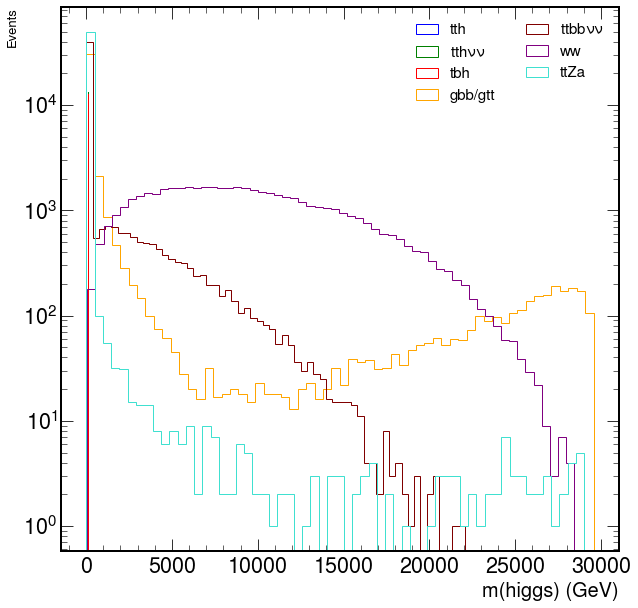

In [34]:
#bins = np.linspace(100, 150, 60)
plt.hist(m_b3b4_tth, bins = bins, alpha = 1, color = 'blue', histtype ='step', label = 'tth')
plt.hist(m_b3b4_tthvv, bins = bins, alpha = 1, color = 'green', histtype ='step', label = r'$tth\nu\nu$')
plt.hist(m_b3b4_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbh')
plt.hist(m_b3b4_gbb, bins = bins, alpha = 1, histtype='step', color = 'orange', label='gbb/gtt')
plt.hist(m_b3b4_ttbbvv, bins = bins, alpha = 1, histtype='step', color = 'maroon', label= r'$ttbb\nu\nu$')
plt.hist(m_b3b4_ww, bins = bins, alpha = 1, histtype='step', color = 'purple', label='ww')
plt.hist(m_b3b4_ttza, bins = bins, alpha = 1, histtype='step', color = 'turquoise', label='ttZa')

#plt.xlim(0, 500)
plt.legend(loc = 1, prop = {"size": 15}, ncol = 2)
plt.xlabel(r'm(higgs) (GeV)', fontsize = 20)
plt.ylabel(r'Events', fontsize = 13)
plt.yscale('log')
plt.style.use([hep.style.ROOT, hep.style.firamath])
plt.show()

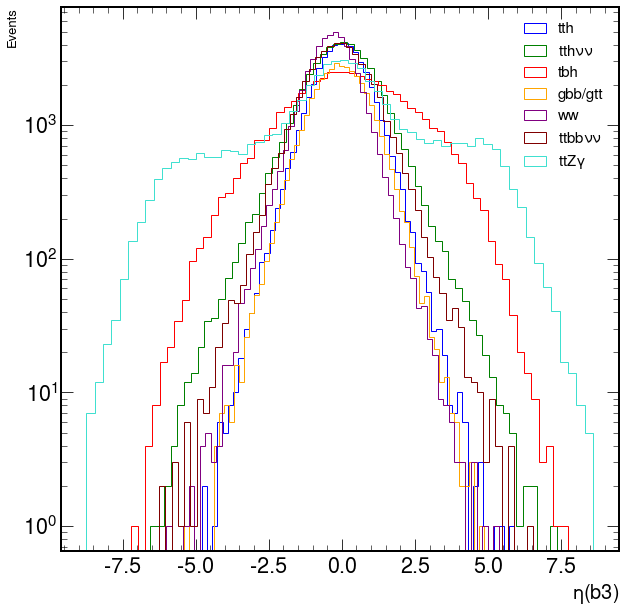

In [35]:
#bins = np.linspace(-2.5, 2.5, 60)
plt.hist(eta_b_tth, bins = bins, alpha = 1, color = 'blue', histtype = 'step', label = 'tth')
plt.hist(eta_b_tthvv, bins = bins, alpha = 1, color = 'green', histtype = 'step', label = r'$tth\nu\nu$')
plt.hist(eta_b_tbhmv, bins = bins, alpha = 1, color = 'red', histtype = 'step', label = 'tbh')
plt.hist(eta_b_gbb, bins = bins, alpha = 1, color = 'orange', histtype = 'step', label = 'gbb/gtt')
plt.hist(eta_b_ww, bins =bins, alpha = 1, color = 'purple', histtype = 'step', label = 'ww')
plt.hist(eta_b_ttbbvv, bins = bins, alpha = 1, color = 'maroon', histtype = 'step', label = r'$ttbb\nu\nu$')
plt.hist(eta_b_ttza, bins = bins, alpha = 1, color = 'turquoise', histtype = 'step', label = r'$ttZ\gamma$')


plt.legend(prop = {"size" : 15})
plt.xlabel(r'$\eta(b3) $', fontsize = 20)
plt.ylabel(r'Events', fontsize = 13)
plt.yscale('log')

plt.show()

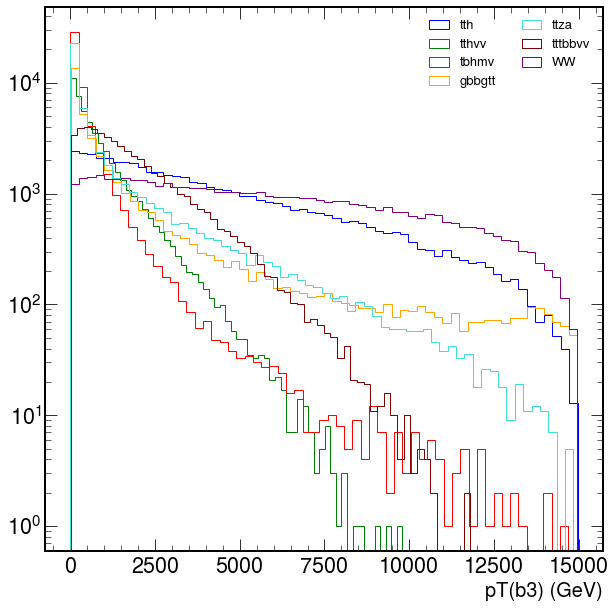

In [36]:
#bins = np.linspace(0, 2000, 60)
plt.hist(pt_b3_tth, bins = bins, alpha = 1, histtype='step', color = 'blue', label='tth')
plt.hist(pt_b3_tthvv, bins = bins, alpha = 1, histtype='step', color = 'green', label='tthvv')
plt.hist(pt_b3_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbhmv')
plt.hist(pt_b3_gbb, bins = bins, alpha = 1, histtype='step', label='gbbgtt',  color = 'orange')
plt.hist(pt_b3_ttza, bins = bins, alpha = 1, histtype='step', label='ttza', color = 'turquoise')
plt.hist(pt_b3_ttbbvv, bins = bins, alpha = 1, histtype='step', label='tttbbvv', color = 'maroon')
plt.hist(pt_b3_ww, bins =bins, alpha = 1, histtype='step', color = 'purple', label='WW')

plt.legend(loc = 1, prop = {"size": 13}, ncol = 2)
#plt.title(r'$\sqrt{s} = 10 TeV$')
plt.yscale('log')
plt.xlabel(r'pT(b3) (GeV)', fontsize = 20)
plt.show()

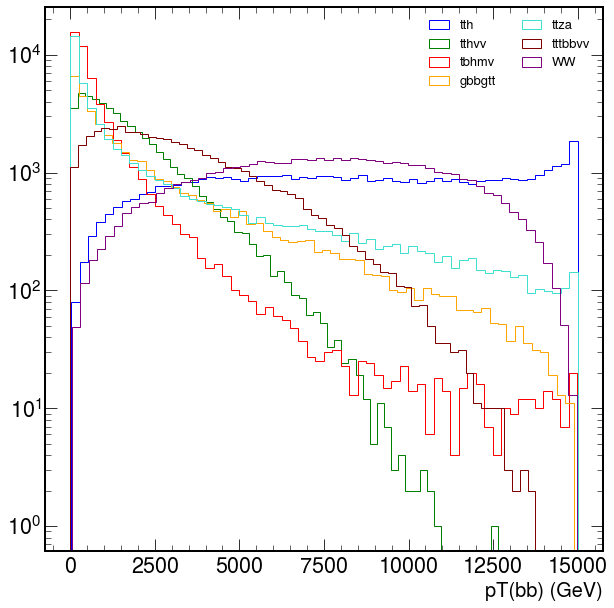

In [37]:
#bins = np.linspace(0, 2000, 60)
plt.hist(pt_b3b4_tth, bins = bins, alpha = 1, histtype='step', color = 'blue', label='tth')
plt.hist(pt_b3b4_tthvv, bins = bins, alpha = 1, histtype='step', color = 'green', label='tthvv')
plt.hist(pt_b3b4_tbhmv, bins = bins, alpha = 1, histtype='step', color = 'red', label='tbhmv')
plt.hist(pt_b3b4_gbb, bins = bins, alpha = 1, histtype='step', label='gbbgtt',  color = 'orange')
plt.hist(pt_b3b4_ttza, bins = bins, alpha = 1, histtype='step', label='ttza', color = 'turquoise')
plt.hist(pt_b3b4_ttbbvv, bins = bins, alpha = 1, histtype='step', label='tttbbvv', color = 'maroon')
plt.hist(pt_b3b4_ww, bins =bins, alpha = 1, histtype='step', color = 'purple', label='WW')

#plt.xlim(0,500)
plt.legend(loc = 1, prop = {"size": 13}, ncol = 2)
#plt.title(r'$\sqrt{s} = 10 TeV$')
plt.yscale('log')
plt.xlabel(r'pT(bb) (GeV)', fontsize = 20)
plt.show()

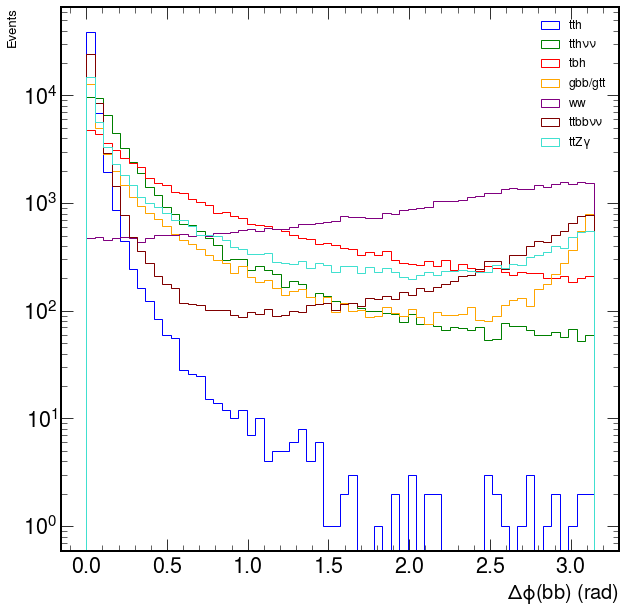

In [38]:
#bins = np.linspace(0, 3.14, 60)
plt.hist(phibb_tth, bins = bins, alpha = 1, color = 'blue', histtype ='step', label = r'$tth$')
plt.hist(phibb_tthvv, bins = bins, alpha = 1, color = 'green', histtype ='step', label = r'$tth\nu\nu$')
plt.hist(phibb_tbhmv, bins = bins, alpha = 1, color = 'red', histtype ='step', label = r'$tbh$')

plt.hist(phibb_gbb, bins = bins, alpha = 1, color = 'orange', histtype ='step', label = r'$gbb/gtt$')
plt.hist(phibb_ww, bins = bins, alpha = 1, color = 'purple', histtype ='step', label = r'$ww$')
plt.hist(phibb_ttbbvv, bins = bins, alpha = 1, color = 'maroon', histtype ='step', label = r'$ttbb\nu\nu$')
plt.hist(phibb_ttza, bins = bins, alpha = 1, color = 'turquoise', histtype ='step', label = r'$ttZ\gamma$')


plt.legend(prop = {"size": 12})
plt.xlabel(r'$\Delta \phi(bb)$ (rad)', fontsize = 20)
plt.ylabel(r'Events', fontsize = 13)
plt.yscale('log')
plt.show()

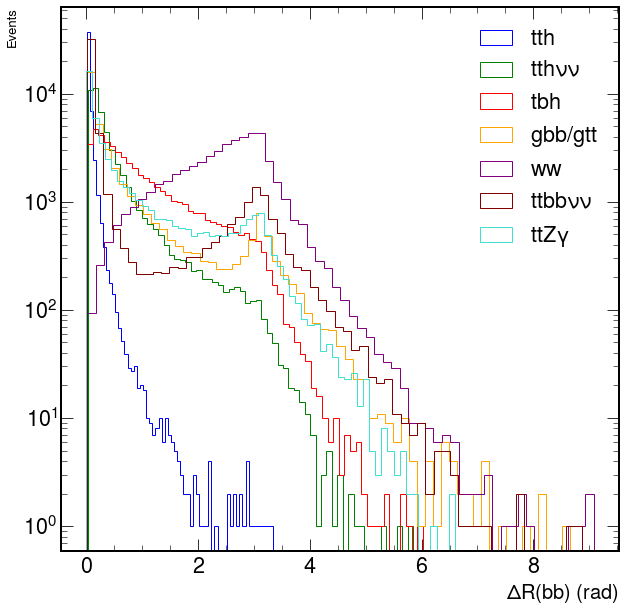

In [39]:
#bins = np.linspace(0, 4, 60)
plt.hist(DelR_bb_tth, bins = bins, alpha = 1, color = 'blue', histtype ='step', label = r'$tth$')
plt.hist(DelR_bb_tthvv, bins = bins, alpha = 1, color = 'green', histtype ='step', label = r'$tth\nu\nu$')
plt.hist(DelR_bb_tbhmv, bins = bins, alpha = 1, color = 'red', histtype ='step', label = r'$tbh$')
plt.hist(DelR_bb_gbb, bins = bins, alpha = 1, color = 'orange', histtype ='step', label = r'$gbb/gtt$')
plt.hist(DelR_bb_ww, bins = bins, alpha = 1, color = 'purple', histtype ='step', label = r'$ww$')
plt.hist(DelR_bb_ttbbvv, bins = bins, alpha = 1, color = 'maroon', histtype ='step', label = r'$ttbb\nu\nu$')
plt.hist(DelR_bb_ttza, bins = bins, alpha = 1, color = 'turquoise', histtype ='step', label = r'$ttZ\gamma$')

plt.legend()
plt.xlabel(r'$\Delta R(bb)$ (rad)', fontsize = 20)
plt.ylabel(r'Events', fontsize = 13)
plt.yscale('log')
plt.show()

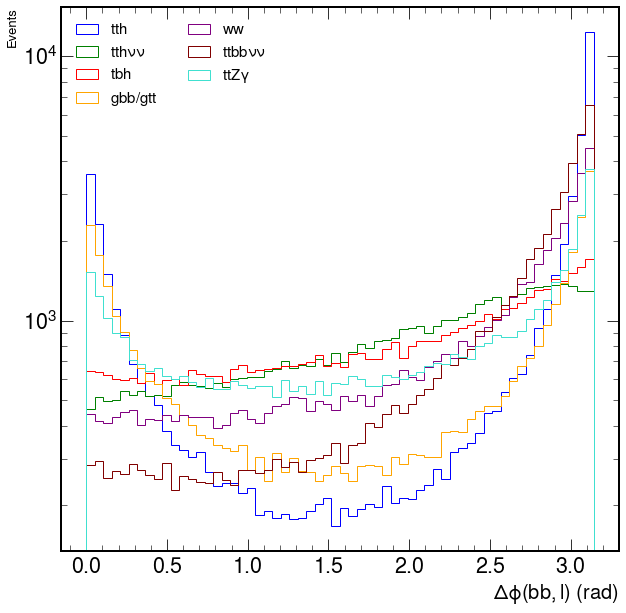

In [40]:
#bins = np.linspace(0, 3.14, 60)
plt.hist(phib3b4l_tth, bins = bins, alpha = 1, color = 'blue', histtype ='step', label = r'$tth$')
plt.hist(phib3b4l_tthvv, bins = bins, alpha = 1, color = 'green', histtype ='step', label = r'$tth\nu\nu$')
plt.hist(phib3b4l_tbhmv, bins = bins, alpha = 1, color = 'red', histtype ='step', label = r'$tbh$')

plt.hist(phib3b4l_gbb, bins = bins, alpha = 1, color = 'orange', histtype ='step', label = r'$gbb/gtt$')
plt.hist(phib3b4l_ww, bins = bins, alpha = 1, color = 'purple', histtype ='step', label = r'$ww$')
plt.hist(phib3b4l_ttbbvv, bins = bins, alpha = 1, color = 'maroon', histtype ='step', label = r'$ttbb\nu\nu$')
plt.hist(phib3b4l_ttza, bins = bins, alpha = 1, color = 'turquoise', histtype ='step', label = r'$ttZ\gamma$')

plt.legend(loc = 2, prop = {"size": 15}, ncol =2)
plt.xlabel(r'$\Delta \phi(bb, l)$ (rad)', fontsize = 20)
plt.ylabel(r'Events', fontsize = 13)
plt.yscale('log')
plt.show()

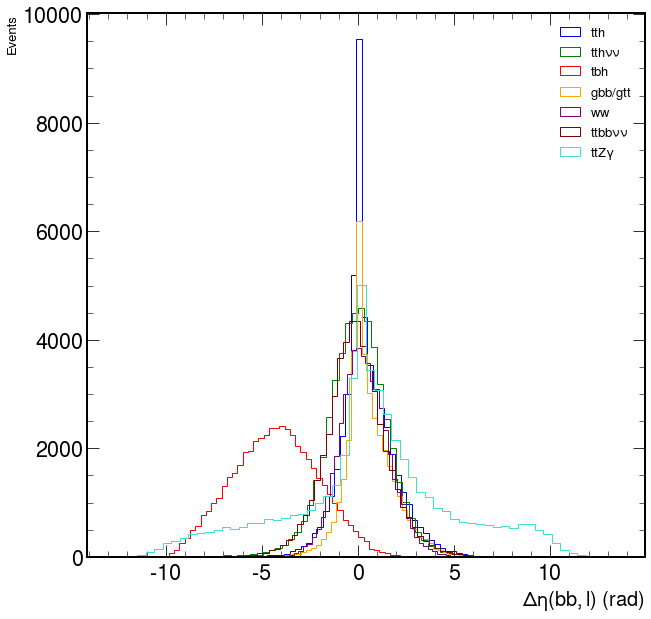

In [41]:
#bins = np.linspace(-8.5, 8.5, 60)
plt.hist(eta_hl_tth, bins = bins, alpha = 1, color = 'blue', histtype ='step', label = r'$tth$')
plt.hist(eta_hl_tthvv, bins = bins, alpha = 1, color = 'green', histtype ='step', label = r'$tth\nu\nu$')
plt.hist(eta_hl_tbhmv, bins = bins, alpha = 1, color = 'red', histtype ='step', label = r'$tbh$')

plt.hist(eta_hl_gbb, bins = bins, alpha = 1, color = 'orange', histtype ='step', label = r'$gbb/gtt$')
plt.hist(eta_hl_ww, bins = bins, alpha = 1, color = 'purple', histtype ='step', label = r'$ww$')
plt.hist(eta_hl_ttbbvv, bins = bins, alpha = 1, color = 'maroon', histtype ='step', label = r'$ttbb\nu\nu$')
plt.hist(eta_hl_ttza, bins = bins, alpha = 1, color = 'turquoise', histtype ='step', label = r'$ttZ\gamma$')

plt.legend(prop = {'size': 13})
plt.xlabel(r'$\Delta \eta(bb, l)$ (rad)', fontsize = 20)
plt.ylabel(r'Events', fontsize = 13)
plt.show()

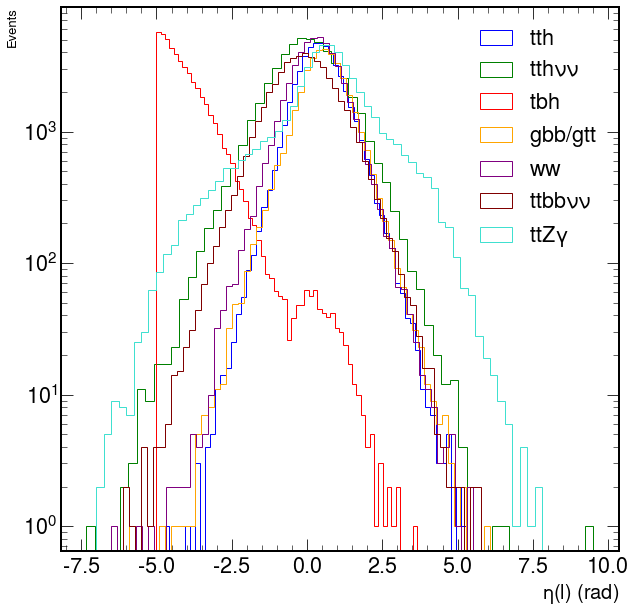

In [42]:
#bins = np.linspace(-8.5, 8.5, 60)
plt.hist(eta_l_tth, bins = bins, alpha = 1, color = 'blue', histtype ='step', label = r'$tth$')
plt.hist(eta_l_tthvv, bins = bins, alpha = 1, color = 'green', histtype ='step', label = r'$tth\nu\nu$')
plt.hist(eta_l_tbhmv, bins = bins, alpha = 1, color = 'red', histtype ='step', label = r'$tbh$')
plt.hist(eta_l_gbb, bins = bins, alpha = 1, color = 'orange', histtype ='step', label = r'$gbb/gtt$')
plt.hist(eta_l_ww, bins = bins, alpha = 1, color = 'purple', histtype ='step', label = r'$ww$')
plt.hist(eta_l_ttbbvv, bins = bins, alpha = 1, color = 'maroon', histtype ='step', label = r'$ttbb\nu\nu$')
plt.hist(eta_l_ttza, bins = bins, alpha = 1, color = 'turquoise', histtype ='step', label = r'$ttZ\gamma$')

plt.legend()
plt.xlabel(r'$ \eta(l)$ (rad)', fontsize = 20)
plt.ylabel(r'Events', fontsize = 13)
plt.yscale('log')
plt.show()

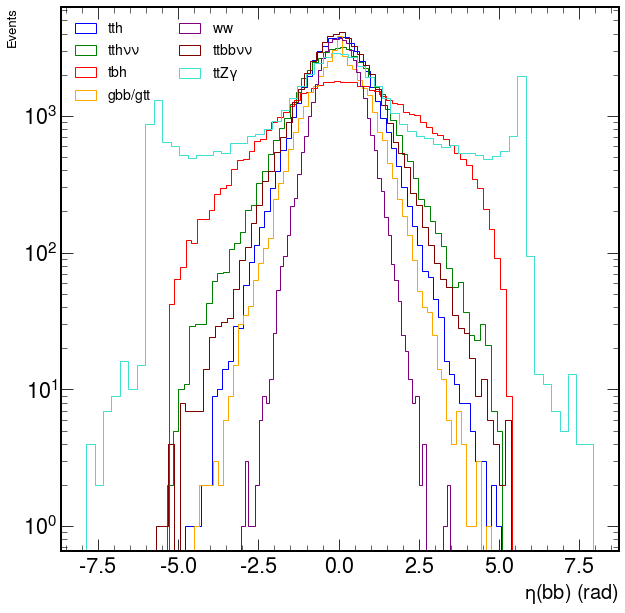

In [43]:
#bins = np.linspace(-2.5, 2.5, 60)
plt.hist(eta_h_tth, bins = bins, alpha = 1, color = 'blue', histtype ='step', label = r'$tth$')
plt.hist(eta_h_tthvv, bins = bins, alpha = 1, color = 'green', histtype ='step', label = r'$tth\nu\nu$')
plt.hist(eta_h_tbhmv, bins = bins, alpha = 1, color = 'red', histtype ='step', label = r'$tbh$')
plt.hist(eta_h_gbb, bins = bins, alpha = 1, color = 'orange', histtype ='step', label = r'$gbb/gtt$')
plt.hist(eta_h_ww, bins = bins, alpha = 1, color = 'purple', histtype ='step', label = r'$ww$')
plt.hist(eta_h_ttbbvv, bins = bins, alpha = 1, color = 'maroon', histtype ='step', label = r'$ttbb\nu\nu$')
plt.hist(eta_h_ttza, bins = bins, alpha = 1, color = 'turquoise', histtype ='step', label = r'$ttZ\gamma$')


plt.legend(loc = 2,ncol = 2, prop = {'size': 14})
plt.xlabel(r'$\eta(bb)$ (rad)', fontsize = 20)
plt.ylabel(r'Events', fontsize = 13)
plt.yscale('log')
plt.show()

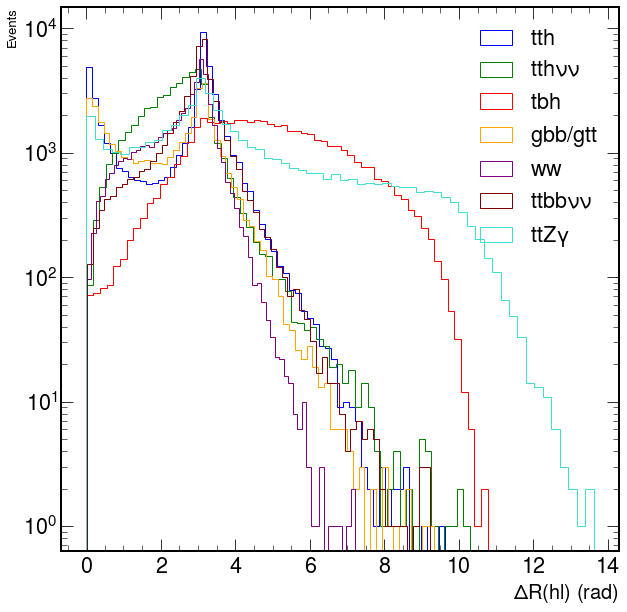

In [44]:
#bins = np.linspace(0, 6, 60)
plt.hist(DelR_hl_tth, bins = bins, alpha = 1, color = 'blue', histtype ='step', label = r'$tth$')
plt.hist(DelR_hl_tthvv, bins = bins, alpha = 1, color = 'green', histtype ='step', label = r'$tth\nu\nu$')
plt.hist(DelR_hl_tbhmv, bins = bins, alpha = 1, color = 'red', histtype ='step', label = r'$tbh$')
plt.hist(DelR_hl_gbb, bins = bins, alpha = 1, color = 'orange', histtype ='step', label = r'$gbb/gtt$')
plt.hist(DelR_hl_ww, bins = bins, alpha = 1, color = 'purple', histtype ='step', label = r'$ww$')
plt.hist(DelR_hl_ttbbvv, bins = bins, alpha = 1, color = 'maroon', histtype ='step', label = r'$ttbb\nu\nu$')
plt.hist(DelR_hl_ttza, bins = bins, alpha = 1, color = 'turquoise', histtype ='step', label = r'$ttZ\gamma$')


plt.legend()
plt.xlabel(r'$\Delta R(hl)$ (rad)', fontsize = 20)
plt.ylabel(r'Events', fontsize = 13)
plt.yscale('log')
plt.show()

In [77]:
#For all DelR final state particles

In [123]:
#eta all final state particles
etab1_tth, etab2_tth, etab3_tth, etab4_tth, etaj1_tth, etaj2_tth, etal_tth = [], [], [], [] ,[], [], []
etab1_tthvv, etab2_tthvv, etab3_tthvv, etab4_tthvv, etaj1_tthvv, etaj2_tthvv, etal_tthvv = [], [], [], [] ,[], [], []
etab1_tbhmv, etab2_tbhmv, etab3_tbhmv, etab4_tbhmv, etaj1_tbhmv, etaj2_tbhmv, etal_tbhmv = [], [], [], [] ,[], [], []
etab1_gbb, etab2_gbb, etab3_gbb, etab4_gbb, etaj1_gbb, etaj2_gbb, etal_gbb = [], [], [], [] ,[], [], []
etab1_ttza, etab2_ttza, etab3_ttza, etab4_ttza, etaj1_ttza, etaj2_ttza, etal_ttza = [], [], [], [] ,[], [], []
etab1_ttbbvv, etab2_ttbbvv, etab3_ttbbvv, etab4_ttbbvv, etaj1_ttbbvv, etaj2_ttbbvv, etal_ttbbvv = [], [], [], [] ,[], [], []
etab1_ww, etab2_ww, etab3_ww, etab4_ww, etaj1_ww, etaj2_ww, etal_ww = [], [], [], [] ,[], [], []

for j in range (0, len(signals)):
    for i in range (0, len(signals[j])):
        etal = eta(signals[j][i][l1_e], signals[j][i][l1_pz])
        etaj1 = eta(signals[j][i][j1_e], signals[j][i][j1_pz])
        etaj2 = eta(signals[j][i][j2_e], signals[j][i][j2_pz])
        etab1 = eta(signals[j][i][b1_e], signals[j][i][b1_pz])
        etab2 = eta(signals[j][i][b2_e], signals[j][i][b2_pz])
        etab3 = eta(signals[j][i][b3_e], signals[j][i][b3_pz])
        etab4 = eta(signals[j][i][b4_e], signals[j][i][b4_pz])
        if j ==0:
            etab1_tth.append(etab1)
            etab2_tth.append(etab2)
            etab3_tth.append(etab3)
            etab4_tth.append(etab4)
            etaj1_tth.append(etaj1)
            etaj2_tth.append(etaj2)
            etal_tth.append(etal)
        elif j == 1:
            etab1_tthvv.append(etab1)
            etab2_tthvv.append(etab2)
            etab3_tthvv.append(etab3)
            etab4_tthvv.append(etab4)
            etaj1_tthvv.append(etaj1)
            etaj2_tthvv.append(etaj2)
            etal_tthvv.append(etal)
        elif j == 2:
            etab1_tbhmv.append(etab1)
            etab2_tbhmv.append(etab2)
            etab3_tbhmv.append(etab3)
            etab4_tbhmv.append(etab4)
            etaj1_tbhmv.append(etaj1)
            etaj2_tbhmv.append(etaj2)
            etal_tbhmv.append(etal)
        elif j == 3:
            etab1_gbb.append(etab1)
            etab2_gbb.append(etab2)
            etab3_gbb.append(etab3)
            etab4_gbb.append(etab4)
            etaj1_gbb.append(etaj1)
            etaj2_gbb.append(etaj2)
            etal_gbb.append(etal)
        elif j == 4:
            etab1_ttza.append(etab1)
            etab2_ttza.append(etab2)
            etab3_ttza.append(etab3)
            etab4_ttza.append(etab4)
            etaj1_ttza.append(etaj1)
            etaj2_ttza.append(etaj2)
            etal_ttza.append(etal)
        elif j == 5:
            etab1_ttbbvv.append(etab1)
            etab2_ttbbvv.append(etab2)
            etab3_ttbbvv.append(etab3)
            etab4_ttbbvv.append(etab4)
            etaj1_ttbbvv.append(etaj1)
            etaj2_ttbbvv.append(etaj2)
            etal_ttbbvv.append(etal)
        elif j == 6:
            etab1_ww.append(etab1)
            etab2_ww.append(etab2)
            etab3_ww.append(etab3)
            etab4_ww.append(etab4)
            etaj1_ww.append(etaj1)
            etaj2_ww.append(etaj2)
            etal_ww.append(etal)
            
eta_b1 = [etab1_tth, etab1_tthvv, etab1_tbhmv, etab1_gbb, etab1_ttza, etab1_ttbbvv, etab1_ww]
eta_b2 = [etab2_tth, etab2_tthvv, etab2_tbhmv, etab2_gbb, etab2_ttza, etab2_ttbbvv, etab2_ww]
eta_b3 = [etab3_tth, etab3_tthvv, etab3_tbhmv, etab3_gbb, etab3_ttza, etab3_ttbbvv, etab3_ww]
eta_b4 = [etab4_tth, etab4_tthvv, etab4_tbhmv, etab4_gbb, etab4_ttza, etab4_ttbbvv, etab4_ww]
eta_j1 = [etaj1_tth, etaj1_tthvv, etaj1_tbhmv, etaj1_gbb, etaj1_ttza, etaj1_ttbbvv, etaj1_ww]
eta_j2 = [etaj2_tth, etaj2_tthvv, etaj2_tbhmv, etaj2_gbb, etaj2_ttza, etaj2_ttbbvv, etaj2_ww]
eta_l = [etal_tth, etal_tthvv, etal_tbhmv, etal_gbb, etal_ttza, etal_ttbbvv, etal_ww]

big_eta = [eta_b1, eta_b2, eta_b3, eta_b4, eta_j1, eta_j2, eta_l]

In [124]:
#delta eta all final state particles
etab1b2_tth, etab1b3_tth, etab1b4_tth, etab1j1_tth, etab1j2_tth, etab1l_tth = [], [], [], [], [], []
etab2b3_tth, etab2b4_tth, etab2j1_tth, etab2j2_tth, etab2l_tth = [], [], [], [], []
etab3b4_tth, etab3j1_tth, etab3j2_tth, etab3l_tth = [], [], [], []
etab4j1_tth, etab4j2_tth, etab4l_tth = [], [], []
etaj1j2_tth, etaj1l_tth = [], []
etaj2l_tth = []

etab1b2_tthvv, etab1b3_tthvv, etab1b4_tthvv, etab1j1_tthvv, etab1j2_tthvv, etab1l_tthvv = [], [], [], [], [], []
etab2b3_tthvv, etab2b4_tthvv, etab2j1_tthvv, etab2j2_tthvv, etab2l_tthvv = [], [], [], [], []
etab3b4_tthvv, etab3j1_tthvv, etab3j2_tthvv, etab3l_tthvv = [], [], [], []
etab4j1_tthvv, etab4j2_tthvv, etab4l_tthvv = [], [], []
etaj1j2_tthvv, etaj1l_tthvv = [], []
etaj2l_tthvv = []

etab1b2_tbhmv, etab1b3_tbhmv, etab1b4_tbhmv, etab1j1_tbhmv, etab1j2_tbhmv, etab1l_tbhmv = [], [], [], [], [], []
etab2b3_tbhmv, etab2b4_tbhmv, etab2j1_tbhmv, etab2j2_tbhmv, etab2l_tbhmv = [], [], [], [], []
etab3b4_tbhmv, etab3j1_tbhmv, etab3j2_tbhmv, etab3l_tbhmv = [], [], [], []
etab4j1_tbhmv, etab4j2_tbhmv, etab4l_tbhmv = [], [], []
etaj1j2_tbhmv, etaj1l_tbhmv = [], []
etaj2l_tbhmv = []

etab1b2_gbb, etab1b3_gbb, etab1b4_gbb, etab1j1_gbb, etab1j2_gbb, etab1l_gbb = [], [], [], [], [], []
etab2b3_gbb, etab2b4_gbb, etab2j1_gbb, etab2j2_gbb, etab2l_gbb = [], [], [], [], []
etab3b4_gbb, etab3j1_gbb, etab3j2_gbb, etab3l_gbb = [], [], [], []
etab4j1_gbb, etab4j2_gbb, etab4l_gbb = [], [], []
etaj1j2_gbb, etaj1l_gbb = [], []
etaj2l_gbb = []

etab1b2_ttza, etab1b3_ttza, etab1b4_ttza, etab1j1_ttza, etab1j2_ttza, etab1l_ttza = [], [], [], [], [], []
etab2b3_ttza, etab2b4_ttza, etab2j1_ttza, etab2j2_ttza, etab2l_ttza = [], [], [], [], []
etab3b4_ttza, etab3j1_ttza, etab3j2_ttza, etab3l_ttza = [], [], [], []
etab4j1_ttza, etab4j2_ttza, etab4l_ttza = [], [], []
etaj1j2_ttza, etaj1l_ttza= [], []
etaj2l_ttza = []

etab1b2_ttbbvv, etab1b3_ttbbvv, etab1b4_ttbbvv, etab1j1_ttbbvv, etab1j2_ttbbvv, etab1l_ttbbvv = [], [], [], [], [], []
etab2b3_ttbbvv, etab2b4_ttbbvv, etab2j1_ttbbvv, etab2j2_ttbbvv, etab2l_ttbbvv = [], [], [], [], []
etab3b4_ttbbvv, etab3j1_ttbbvv, etab3j2_ttbbvv, etab3l_ttbbvv = [], [], [], []
etab4j1_ttbbvv, etab4j2_ttbbvv, etab4l_ttbbvv = [], [], []
etaj1j2_ttbbvv, etaj1l_ttbbvv= [], []
etaj2l_ttbbvv = []

etab1b2_ww, etab1b3_ww, etab1b4_ww, etab1j1_ww, etab1j2_ww, etab1l_ww = [], [], [], [], [], []
etab2b3_ww, etab2b4_ww, etab2j1_ww, etab2j2_ww, etab2l_ww = [], [], [], [], []
etab3b4_ww, etab3j1_ww, etab3j2_ww, etab3l_ww = [], [], [], []
etab4j1_ww, etab4j2_ww, etab4l_ww = [], [], []
etaj1j2_ww, etaj1l_ww = [], []
etaj2l_ww = []

for j in range (0, len(eta_b1)):
    for i in range (0, len(eta_b1[j])):
        del_etab1b2 = eta_b1[j][i] - eta_b2[j][i]
        del_etab1b3 = eta_b1[j][i] - eta_b3[j][i]
        del_etab1b4 = eta_b1[j][i] - eta_b4[j][i]
        del_etab1j1 = eta_b1[j][i] - eta_j1[j][i]
        del_etab1j2 = eta_b1[j][i] - eta_j2[j][i]
        del_etab1l = eta_b1[j][i] - eta_l[j][i]
        
        del_etab2b3 = eta_b2[j][i] - eta_b3[j][i]
        del_etab2b4 = eta_b2[j][i] - eta_b4[j][i]
        del_etab2j1 = eta_b2[j][i] - eta_j1[j][i]
        del_etab2j2 = eta_b2[j][i] - eta_j2[j][i]
        del_etab2l = eta_b2[j][i] - eta_l[j][i]
        
        del_etab3b4 = eta_b3[j][i] - eta_b4[j][i]
        del_etab3j1 = eta_b3[j][i] - eta_j1[j][i]
        del_etab3j2 = eta_b3[j][i] - eta_j2[j][i]
        del_etab3l = eta_b3[j][i] - eta_l[j][i]
        
        del_etab4j1 = eta_b4[j][i] - eta_j1[j][i]
        del_etab4j2 = eta_b4[j][i] - eta_j2[j][i]
        del_etab4l = eta_b4[j][i] - eta_l[j][i]
        
        del_etaj1j2 = eta_j1[j][i] - eta_j2[j][i]
        del_etaj1l = eta_j1[j][i] - eta_l[j][i]
        
        del_etaj2l = eta_j2[j][i] - eta_l[j][i]
        if j == 0:
            etab1b2_tth.append(del_etab1b2)
            etab1b3_tth.append(del_etab1b3)
            etab1b4_tth.append(del_etab1b4)
            etab1j1_tth.append(del_etab1j1)
            etab1j2_tth.append(del_etab1j2)
            etab1l_tth.append(del_etab1l)
            
            etab2b3_tth.append(del_etab2b3)
            etab2b4_tth.append(del_etab2b4)
            etab2j1_tth.append(del_etab2j1)
            etab2j2_tth.append(del_etab2j2)
            etab2l_tth.append(del_etab2l)
            
            etab3b4_tth.append(del_etab3b4)
            etab3j1_tth.append(del_etab3j1)
            etab3j2_tth.append(del_etab3j2)
            etab3l_tth.append(del_etab3l)
            
            etab4j1_tth.append(del_etab4j1)
            etab4j2_tth.append(del_etab4j2)
            etab4l_tth.append(del_etab4l)
            
            etaj1j2_tth.append(del_etaj1j2)
            etaj1l_tth.append(del_etaj1l)
            
            etaj2l_tth.append(del_etaj2l)
            
        elif j == 1:
            etab1b2_tthvv.append(del_etab1b2)
            etab1b3_tthvv.append(del_etab1b3)
            etab1b4_tthvv.append(del_etab1b4)
            etab1j1_tthvv.append(del_etab1j1)
            etab1j2_tthvv.append(del_etab1j2)
            etab1l_tthvv.append(del_etab1l)
            
            etab2b3_tthvv.append(del_etab2b3)
            etab2b4_tthvv.append(del_etab2b4)
            etab2j1_tthvv.append(del_etab2j1)
            etab2j2_tthvv.append(del_etab2j2)
            etab2l_tthvv.append(del_etab2l)
            
            etab3b4_tthvv.append(del_etab3b4)
            etab3j1_tthvv.append(del_etab3j1)
            etab3j2_tthvv.append(del_etab3j2)
            etab3l_tthvv.append(del_etab3l)
            
            etab4j1_tthvv.append(del_etab4j1)
            etab4j2_tthvv.append(del_etab4j2)
            etab4l_tthvv.append(del_etab4l)
            
            etaj1j2_tthvv.append(del_etaj1j2)
            etaj1l_tthvv.append(del_etaj1l)
            
            etaj2l_tthvv.append(del_etaj2l)          
        elif j == 2:
            etab1b2_tbhmv.append(del_etab1b2)
            etab1b3_tbhmv.append(del_etab1b3)
            etab1b4_tbhmv.append(del_etab1b4)
            etab1j1_tbhmv.append(del_etab1j1)
            etab1j2_tbhmv.append(del_etab1j2)
            etab1l_tbhmv.append(del_etab1l)
            
            etab2b3_tbhmv.append(del_etab2b3)
            etab2b4_tbhmv.append(del_etab2b4)
            etab2j1_tbhmv.append(del_etab2j1)
            etab2j2_tbhmv.append(del_etab2j2)
            etab2l_tbhmv.append(del_etab2l)
            
            etab3b4_tbhmv.append(del_etab3b4)
            etab3j1_tbhmv.append(del_etab3j1)
            etab3j2_tbhmv.append(del_etab3j2)
            etab3l_tbhmv.append(del_etab3l)
            
            etab4j1_tbhmv.append(del_etab4j1)
            etab4j2_tbhmv.append(del_etab4j2)
            etab4l_tbhmv.append(del_etab4l)
            
            etaj1j2_tbhmv.append(del_etaj1j2)
            etaj1l_tbhmv.append(del_etaj1l)
            
            etaj2l_tbhmv.append(del_etaj2l)            
        elif j == 3:
            etab1b2_gbb.append(del_etab1b2)
            etab1b3_gbb.append(del_etab1b3)
            etab1b4_gbb.append(del_etab1b4)
            etab1j1_gbb.append(del_etab1j1)
            etab1j2_gbb.append(del_etab1j2)
            etab1l_gbb.append(del_etab1l)
            
            etab2b3_gbb.append(del_etab2b3)
            etab2b4_gbb.append(del_etab2b4)
            etab2j1_gbb.append(del_etab2j1)
            etab2j2_gbb.append(del_etab2j2)
            etab2l_gbb.append(del_etab2l)
            
            etab3b4_gbb.append(del_etab3b4)
            etab3j1_gbb.append(del_etab3j1)
            etab3j2_gbb.append(del_etab3j2)
            etab3l_gbb.append(del_etab3l)
            
            etab4j1_gbb.append(del_etab4j1)
            etab4j2_gbb.append(del_etab4j2)
            etab4l_gbb.append(del_etab4l)
            
            etaj1j2_gbb.append(del_etaj1j2)
            etaj1l_gbb.append(del_etaj1l)
            
            etaj2l_gbb.append(del_etaj2l)     
        elif j == 4:
            etab1b2_ttza.append(del_etab1b2)
            etab1b3_ttza.append(del_etab1b3)
            etab1b4_ttza.append(del_etab1b4)
            etab1j1_ttza.append(del_etab1j1)
            etab1j2_ttza.append(del_etab1j2)
            etab1l_ttza.append(del_etab1l)
            
            etab2b3_ttza.append(del_etab2b3)
            etab2b4_ttza.append(del_etab2b4)
            etab2j1_ttza.append(del_etab2j1)
            etab2j2_ttza.append(del_etab2j2)
            etab2l_ttza.append(del_etab2l)
            
            etab3b4_ttza.append(del_etab3b4)
            etab3j1_ttza.append(del_etab3j1)
            etab3j2_ttza.append(del_etab3j2)
            etab3l_ttza.append(del_etab3l)
            
            etab4j1_ttza.append(del_etab4j1)
            etab4j2_ttza.append(del_etab4j2)
            etab4l_ttza.append(del_etab4l)
            
            etaj1j2_ttza.append(del_etaj1j2)
            etaj1l_ttza.append(del_etaj1l)
            
            etaj2l_ttza.append(del_etaj2l)
        elif j == 5:
            etab1b2_ttbbvv.append(del_etab1b2)
            etab1b3_ttbbvv.append(del_etab1b3)
            etab1b4_ttbbvv.append(del_etab1b4)
            etab1j1_ttbbvv.append(del_etab1j1)
            etab1j2_ttbbvv.append(del_etab1j2)
            etab1l_ttbbvv.append(del_etab1l)
            
            etab2b3_ttbbvv.append(del_etab2b3)
            etab2b4_ttbbvv.append(del_etab2b4)
            etab2j1_ttbbvv.append(del_etab2j1)
            etab2j2_ttbbvv.append(del_etab2j2)
            etab2l_ttbbvv.append(del_etab2l)
            
            etab3b4_ttbbvv.append(del_etab3b4)
            etab3j1_ttbbvv.append(del_etab3j1)
            etab3j2_ttbbvv.append(del_etab3j2)
            etab3l_ttbbvv.append(del_etab3l)
            
            etab4j1_ttbbvv.append(del_etab4j1)
            etab4j2_ttbbvv.append(del_etab4j2)
            etab4l_ttbbvv.append(del_etab4l)
            
            etaj1j2_ttbbvv.append(del_etaj1j2)
            etaj1l_ttbbvv.append(del_etaj1l)
            
            etaj2l_ttbbvv.append(del_etaj2l)
        elif j == 6:
            etab1b2_ww.append(del_etab1b2)
            etab1b3_ww.append(del_etab1b3)
            etab1b4_ww.append(del_etab1b4)
            etab1j1_ww.append(del_etab1j1)
            etab1j2_ww.append(del_etab1j2)
            etab1l_ww.append(del_etab1l)
            
            etab2b3_ww.append(del_etab2b3)
            etab2b4_ww.append(del_etab2b4)
            etab2j1_ww.append(del_etab2j1)
            etab2j2_ww.append(del_etab2j2)
            etab2l_ww.append(del_etab2l)
            
            etab3b4_ww.append(del_etab3b4)
            etab3j1_ww.append(del_etab3j1)
            etab3j2_ww.append(del_etab3j2)
            etab3l_ww.append(del_etab3l)
            
            etab4j1_ww.append(del_etab4j1)
            etab4j2_ww.append(del_etab4j2)
            etab4l_ww.append(del_etab4l)
            
            etaj1j2_ww.append(del_etaj1j2)
            etaj1l_ww.append(del_etaj1l)
            
            etaj2l_ww.append(del_etaj2l)

In [125]:
etab1b2 = [etab1b2_tth, etab1b2_tthvv, etab1b2_tbhmv, etab1b2_gbb, etab1b2_ttza, etab1b2_ttbbvv, etab1b2_ww]
etab1b3 = [etab1b3_tth, etab1b3_tthvv, etab1b3_tbhmv, etab1b3_gbb, etab1b3_ttza, etab1b3_ttbbvv, etab1b3_ww]
etab1b4 = [etab1b4_tth, etab1b4_tthvv, etab1b4_tbhmv, etab1b4_gbb, etab1b4_ttza, etab1b4_ttbbvv, etab1b4_ww]
etab1j1 = [etab1j1_tth, etab1j1_tthvv, etab1j1_tbhmv, etab1j1_gbb, etab1j1_ttza, etab1j1_ttbbvv, etab1j1_ww]
etab1j2 = [etab1j2_tth, etab1j2_tthvv, etab1j2_tbhmv, etab1j2_gbb, etab1j2_ttza, etab1j2_ttbbvv, etab1j2_ww]
etab1l = [etab1l_tth, etab1l_tthvv, etab1l_tbhmv, etab1l_gbb, etab1l_ttza, etab1l_ttbbvv, etab1l_ww]

etab2b3 = [etab2b3_tth, etab2b3_tthvv, etab2b3_tbhmv, etab2b3_gbb, etab2b3_ttza, etab2b3_ttbbvv, etab2b3_ww]
etab2b4 = [etab2b4_tth, etab2b4_tthvv, etab2b4_tbhmv, etab2b4_gbb, etab2b4_ttza, etab2b4_ttbbvv, etab2b4_ww]
etab2j1 = [etab2j1_tth, etab2j1_tthvv, etab2j1_tbhmv, etab2j1_gbb, etab2j1_ttza, etab2j1_ttbbvv, etab2j1_ww]
etab2j2 = [etab2j2_tth, etab2j2_tthvv, etab2j2_tbhmv, etab2j2_gbb, etab2j2_ttza, etab2j2_ttbbvv, etab2j2_ww]
etab2l = [etab2l_tth, etab2l_tthvv, etab2l_tbhmv, etab2l_gbb, etab2l_ttza, etab2l_ttbbvv, etab2l_ww]

etab3b4 = [etab3b4_tth, etab3b4_tthvv, etab3b4_tbhmv, etab3b4_gbb, etab3b4_ttza, etab3b4_ttbbvv, etab3b4_ww]
etab3j1 = [etab3j1_tth, etab3j1_tthvv, etab3j1_tbhmv, etab3j1_gbb, etab3j1_ttza, etab3j1_ttbbvv, etab3j1_ww]
etab3j2 = [etab3j2_tth, etab3j2_tthvv, etab3j2_tbhmv, etab3j2_gbb, etab3j2_ttza, etab3j2_ttbbvv, etab3j2_ww]
etab3l = [etab3l_tth, etab3l_tthvv, etab3l_tbhmv, etab3l_gbb, etab3l_ttza, etab3l_ttbbvv, etab3l_ww]

etab4j1 = [etab4j1_tth, etab4j1_tthvv, etab4j1_tbhmv, etab4j1_gbb, etab4j1_ttza, etab4j1_ttbbvv, etab4j1_ww]
etab4j2 = [etab4j2_tth, etab4j2_tthvv, etab4j2_tbhmv, etab4j2_gbb, etab4j2_ttza, etab4j2_ttbbvv, etab4j2_ww]
etab4l = [etab4l_tth, etab4l_tthvv, etab4l_tbhmv, etab4l_gbb, etab4l_ttza, etab4l_ttbbvv, etab4l_ww]

etaj1j2 = [etaj1j2_tth, etaj1j2_tthvv, etaj1j2_tbhmv, etaj1j2_gbb, etaj1j2_ttza, etaj1j2_ttbbvv, etaj1j2_ww]
etaj1l = [etaj1l_tth, etaj1l_tthvv, etaj1l_tbhmv, etaj1l_gbb, etaj1l_ttza, etaj1l_ttbbvv, etaj1l_ww]

etaj2l = [etaj2l_tth, etaj2l_tthvv, etaj2l_tbhmv, etaj2l_gbb, etaj2l_ttza, etaj2l_ttbbvv, etaj2l_ww]

delta_eta = [etab1b2, etab1b3, etab1b4, etab1j1, etab1j2, etab1l, 
            etab2b3, etab2b4, etab2j1, etab2j2, etab2l,
            etab3b4, etab3j1, etab3j2, etab3l,
            etab4j1, etab4j2, etab4l,
            etaj1j2, etaj1l,
            etaj2l]

In [126]:
#delta phi all final state particles
phib1b2_tth, phib1b3_tth, phib1b4_tth, phib1j1_tth, phib1j2_tth, phib1l_tth = [], [], [], [], [], []
phib2b3_tth, phib2b4_tth, phib2j1_tth, phib2j2_tth, phib2l_tth = [], [], [], [], []
phib3b4_tth, phib3j1_tth, phib3j2_tth, phib3l_tth = [], [], [], []
phib4j1_tth, phib4j2_tth, phib4l_tth = [], [], []
phij1j2_tth, phij1l_tth = [], []
phij2l_tth = []

phib1b2_tthvv, phib1b3_tthvv, phib1b4_tthvv, phib1j1_tthvv, phib1j2_tthvv, phib1l_tthvv = [], [], [], [], [], []
phib2b3_tthvv, phib2b4_tthvv, phib2j1_tthvv, phib2j2_tthvv, phib2l_tthvv = [], [], [], [], []
phib3b4_tthvv, phib3j1_tthvv, phib3j2_tthvv, phib3l_tthvv = [], [], [], []
phib4j1_tthvv, phib4j2_tthvv, phib4l_tthvv = [], [], []
phij1j2_tthvv, phij1l_tthvv = [], []
phij2l_tthvv = []

phib1b2_tbhmv, phib1b3_tbhmv, phib1b4_tbhmv, phib1j1_tbhmv, phib1j2_tbhmv, phib1l_tbhmv = [], [], [], [], [], []
phib2b3_tbhmv, phib2b4_tbhmv, phib2j1_tbhmv, phib2j2_tbhmv, phib2l_tbhmv = [], [], [], [], []
phib3b4_tbhmv, phib3j1_tbhmv, phib3j2_tbhmv, phib3l_tbhmv = [], [], [], []
phib4j1_tbhmv, phib4j2_tbhmv, phib4l_tbhmv = [], [], []
phij1j2_tbhmv, phij1l_tbhmv = [], []
phij2l_tbhmv = []

phib1b2_gbb, phib1b3_gbb, phib1b4_gbb, phib1j1_gbb, phib1j2_gbb, phib1l_gbb = [], [], [], [], [], []
phib2b3_gbb, phib2b4_gbb, phib2j1_gbb, phib2j2_gbb, phib2l_gbb = [], [], [], [], []
phib3b4_gbb, phib3j1_gbb, phib3j2_gbb, phib3l_gbb = [], [], [], []
phib4j1_gbb, phib4j2_gbb, phib4l_gbb = [], [], []
phij1j2_gbb, phij1l_gbb = [], []
phij2l_gbb = []

phib1b2_ttza, phib1b3_ttza, phib1b4_ttza, phib1j1_ttza, phib1j2_ttza, phib1l_ttza = [], [], [], [], [], []
phib2b3_ttza, phib2b4_ttza, phib2j1_ttza, phib2j2_ttza, phib2l_ttza = [], [], [], [], []
phib3b4_ttza, phib3j1_ttza, phib3j2_ttza, phib3l_ttza = [], [], [], []
phib4j1_ttza, phib4j2_ttza, phib4l_ttza = [], [], []
phij1j2_ttza, phij1l_ttza = [], []
phij2l_ttza = []

phib1b2_ttbbvv, phib1b3_ttbbvv, phib1b4_ttbbvv, phib1j1_ttbbvv, phib1j2_ttbbvv, phib1l_ttbbvv = [], [], [], [], [], []
phib2b3_ttbbvv, phib2b4_ttbbvv, phib2j1_ttbbvv, phib2j2_ttbbvv, phib2l_ttbbvv = [], [], [], [], []
phib3b4_ttbbvv, phib3j1_ttbbvv, phib3j2_ttbbvv, phib3l_ttbbvv = [], [], [], []
phib4j1_ttbbvv, phib4j2_ttbbvv, phib4l_ttbbvv = [], [], []
phij1j2_ttbbvv, phij1l_ttbbvv = [], []
phij2l_ttbbvv = []

phib1b2_ww, phib1b3_ww, phib1b4_ww, phib1j1_ww, phib1j2_ww, phib1l_ww = [], [], [], [], [], []
phib2b3_ww, phib2b4_ww, phib2j1_ww, phib2j2_ww, phib2l_ww = [], [], [], [], []
phib3b4_ww, phib3j1_ww, phib3j2_ww, phib3l_ww = [], [], [], []
phib4j1_ww, phib4j2_ww, phib4l_ww = [], [], []
phij1j2_ww, phij1l_ww = [], []
phij2l_ww = []


for j in range (0, len(signals)):
    for i in range (0, len(signals[j])):
        delphi_b1b2 = phi(signals[j][i][b1_px], signals[j][i][b1_py], signals[j][i][b2_px], signals[j][i][b2_py])
        delphi_b1b3 = phi(signals[j][i][b1_px], signals[j][i][b1_py], signals[j][i][b3_px], signals[j][i][b3_py])
        delphi_b1b4 = phi(signals[j][i][b1_px], signals[j][i][b1_py], signals[j][i][b4_px], signals[j][i][b4_py])
        delphi_b1j1 = phi(signals[j][i][b1_px], signals[j][i][b1_py], signals[j][i][j1_px], signals[j][i][j1_py])
        delphi_b1j2 = phi(signals[j][i][b1_px], signals[j][i][b1_py], signals[j][i][j2_px], signals[j][i][j2_py])
        delphi_b1l = phi(signals[j][i][b1_px], signals[j][i][b1_py], signals[j][i][l1_px], signals[j][i][l1_py])
        
        delphi_b2b3 = phi(signals[j][i][b2_px], signals[j][i][b2_py], signals[j][i][b3_px], signals[j][i][b3_py])
        delphi_b2b4 = phi(signals[j][i][b2_px], signals[j][i][b2_py], signals[j][i][b4_px], signals[j][i][b4_py])
        delphi_b2j1 = phi(signals[j][i][b2_px], signals[j][i][b2_py], signals[j][i][j1_px], signals[j][i][j1_py])
        delphi_b2j2 = phi(signals[j][i][b2_px], signals[j][i][b2_py], signals[j][i][j2_px], signals[j][i][j2_py])
        delphi_b2l = phi(signals[j][i][b2_px], signals[j][i][b2_py], signals[j][i][l1_px], signals[j][i][l1_py])
        
        delphi_b3b4 = phi(signals[j][i][b3_px], signals[j][i][b3_py], signals[j][i][b4_px], signals[j][i][b4_py])
        delphi_b3j1 = phi(signals[j][i][b3_px], signals[j][i][b3_py], signals[j][i][j1_px], signals[j][i][j1_py])
        delphi_b3j2 = phi(signals[j][i][b3_px], signals[j][i][b3_py], signals[j][i][j2_px], signals[j][i][j2_py])
        delphi_b3l = phi(signals[j][i][b3_px], signals[j][i][b3_py], signals[j][i][l1_px], signals[j][i][l1_py])
        
        delphi_b4j1 = phi(signals[j][i][b4_px], signals[j][i][b4_py], signals[j][i][j1_px], signals[j][i][j1_py])
        delphi_b4j2 = phi(signals[j][i][b4_px], signals[j][i][b4_py], signals[j][i][j2_px], signals[j][i][j2_py])
        delphi_b4l = phi(signals[j][i][b4_px], signals[j][i][b4_py], signals[j][i][l1_px], signals[j][i][l1_py])
        
        delphi_j1j2 = phi(signals[j][i][j1_px], signals[j][i][j1_py], signals[j][i][j2_px], signals[j][i][j2_py])
        delphi_j1l = phi(signals[j][i][j1_px], signals[j][i][j1_py], signals[j][i][l1_px], signals[j][i][l1_py])
        
        delphi_j2l = phi(signals[j][i][j2_px], signals[j][i][j2_py], signals[j][i][l1_px], signals[j][i][l1_py])
        if j == 0:
            phib1b2_tth.append(delphi_b1b2)
            phib1b3_tth.append(delphi_b1b3)
            phib1b4_tth.append(delphi_b1b4) 
            phib1j1_tth.append(delphi_b1j1)
            phib1j2_tth.append(delphi_b1j2)
            phib1l_tth.append(delphi_b1l)
            
            phib2b3_tth.append(delphi_b2b3)
            phib2b4_tth.append(delphi_b2b4)
            phib2j1_tth.append(delphi_b2j1)
            phib2j2_tth.append(delphi_b2j2)
            phib2l_tth.append(delphi_b2l)
            
            phib3b4_tth.append(delphi_b3b4) 
            phib3j1_tth.append(delphi_b3j1) 
            phib3j2_tth.append(delphi_b3j2) 
            phib3l_tth.append(delphi_b3l)
            
            phib4j1_tth.append(delphi_b4j1) 
            phib4j2_tth.append(delphi_b4j2)
            phib4l_tth.append(delphi_b4l)
            
            phij1j2_tth.append(delphi_j1j2)
            phij1l_tth.append(delphi_j1l)
            
            phij2l_tth.append(delphi_j2l)
            
        elif j == 1:
            phib1b2_tthvv.append(delphi_b1b2)
            phib1b3_tthvv.append(delphi_b1b3) 
            phib1b4_tthvv.append(delphi_b1b4) 
            phib1j1_tthvv.append(delphi_b1j1) 
            phib1j2_tthvv.append(delphi_b1j2) 
            phib1l_tthvv.append(delphi_b1l)
            
            phib2b3_tthvv.append(delphi_b2b3) 
            phib2b4_tthvv.append(delphi_b2b4)
            phib2j1_tthvv.append(delphi_b2j1) 
            phib2j2_tthvv.append(delphi_b2j2) 
            phib2l_tthvv.append(delphi_b2l)
            
            phib3b4_tthvv.append(delphi_b3b4) 
            phib3j1_tthvv.append(delphi_b3j1) 
            phib3j2_tthvv.append(delphi_b3j2) 
            phib3l_tthvv.append(delphi_b3l)
            
            phib4j1_tthvv.append(delphi_b4j1) 
            phib4j2_tthvv.append(delphi_b4j2) 
            phib4l_tthvv.append(delphi_b4l)
            
            phij1j2_tthvv.append(delphi_j1j2) 
            phij1l_tthvv.append(delphi_j1l)
            
            phij2l_tthvv.append(delphi_j2l)
            
        elif j == 2:
            phib1b2_tbhmv.append(delphi_b1b2)
            phib1b3_tbhmv.append(delphi_b1b3) 
            phib1b4_tbhmv.append(delphi_b1b4)
            phib1j1_tbhmv.append(delphi_b1j1) 
            phib1j2_tbhmv.append(delphi_b1j2) 
            phib1l_tbhmv.append(delphi_b1l)
            
            phib2b3_tbhmv.append(delphi_b2b3) 
            phib2b4_tbhmv.append(delphi_b2b4)
            phib2j1_tbhmv.append(delphi_b2j1) 
            phib2j2_tbhmv.append(delphi_b2j2) 
            phib2l_tbhmv.append(delphi_b2l)
            
            phib3b4_tbhmv.append(delphi_b3b4) 
            phib3j1_tbhmv.append(delphi_b3j1) 
            phib3j2_tbhmv.append(delphi_b3j2) 
            phib3l_tbhmv.append(delphi_b3l)
            
            phib4j1_tbhmv.append(delphi_b4j1) 
            phib4j2_tbhmv.append(delphi_b4j2) 
            phib4l_tbhmv.append(delphi_b4l)
            
            phij1j2_tbhmv.append(delphi_j1j2) 
            phij1l_tbhmv.append(delphi_j1l)
            
            phij2l_tbhmv.append(delphi_j2l)
            
            
        elif j == 3:
            phib1b2_gbb.append(delphi_b1b2)
            phib1b3_gbb.append(delphi_b1b3) 
            phib1b4_gbb.append(delphi_b1b4) 
            phib1j1_gbb.append(delphi_b1j1) 
            phib1j2_gbb.append(delphi_b1j2) 
            phib1l_gbb.append(delphi_b1l)
            
            phib2b3_gbb.append(delphi_b2b3) 
            phib2b4_gbb.append(delphi_b2b4)
            phib2j1_gbb.append(delphi_b2j1)
            phib2j2_gbb.append(delphi_b2j2)
            phib2l_gbb.append(delphi_b2l)
            
            phib3b4_gbb.append(delphi_b3b4) 
            phib3j1_gbb.append(delphi_b3j1) 
            phib3j2_gbb.append(delphi_b3j2) 
            phib3l_gbb.append(delphi_b3l)
            
            phib4j1_gbb.append(delphi_b4j1) 
            phib4j2_gbb.append(delphi_b4j2) 
            phib4l_gbb.append(delphi_b4l)
            
            phij1j2_gbb.append(delphi_j1j2) 
            phij1l_gbb.append(delphi_j1l)
            
            phij2l_gbb.append(delphi_j2l)
            
        elif j == 4:
            phib1b2_ttza.append(delphi_b1b2) 
            phib1b3_ttza.append(delphi_b1b3)  
            phib1b4_ttza.append(delphi_b1b4)  
            phib1j1_ttza.append(delphi_b1j1)  
            phib1j2_ttza.append(delphi_b1j2)  
            phib1l_ttza.append(delphi_b1l) 
            
            phib2b3_ttza.append(delphi_b2b3) 
            phib2b4_ttza.append(delphi_b2b4) 
            phib2j1_ttza.append(delphi_b2j1)  
            phib2j2_ttza.append(delphi_b2j2)  
            phib2l_ttza.append(delphi_b2l) 
            
            phib3b4_ttza.append(delphi_b3b4)  
            phib3j1_ttza.append(delphi_b3j1)  
            phib3j2_ttza.append(delphi_b3j2)  
            phib3l_ttza.append(delphi_b3l) 
            
            phib4j1_ttza.append(delphi_b4j1)  
            phib4j2_ttza.append(delphi_b4j2)  
            phib4l_ttza.append(delphi_b4l) 
            
            phij1j2_ttza.append(delphi_j1j2)  
            phij1l_ttza.append(delphi_j1l) 
            
            phij2l_ttza.append(delphi_j2l) 
            
            
        elif j == 5:
            phib1b2_ttbbvv.append(delphi_b1b2)
            phib1b3_ttbbvv.append(delphi_b1b3) 
            phib1b4_ttbbvv.append(delphi_b1b4)
            phib1j1_ttbbvv.append(delphi_b1j1) 
            phib1j2_ttbbvv.append(delphi_b1j2) 
            phib1l_ttbbvv.append(delphi_b1l)
            
            phib2b3_ttbbvv.append(delphi_b2b3) 
            phib2b4_ttbbvv.append(delphi_b2b4)
            phib2j1_ttbbvv.append(delphi_b2j1) 
            phib2j2_ttbbvv.append(delphi_b2j2) 
            phib2l_ttbbvv.append(delphi_b2l)
            
            phib3b4_ttbbvv.append(delphi_b3b4)
            phib3j1_ttbbvv.append(delphi_b3j1) 
            phib3j2_ttbbvv.append(delphi_b3j2) 
            phib3l_ttbbvv.append(delphi_b3l)
            
            phib4j1_ttbbvv.append(delphi_b4j1) 
            phib4j2_ttbbvv.append(delphi_b4j2) 
            phib4l_ttbbvv.append(delphi_b4l)
            
            phij1j2_ttbbvv.append(delphi_j1j2) 
            phij1l_ttbbvv.append(delphi_j1l)
            
            phij2l_ttbbvv.append(delphi_j2l)
            
        elif j == 6:
            phib1b2_ww.append(delphi_b1b2) 
            phib1b3_ww.append(delphi_b1b3)
            phib1b4_ww.append(delphi_b1b4) 
            phib1j1_ww.append(delphi_b1j1) 
            phib1j2_ww.append(delphi_b1j2) 
            phib1l_ww.append(delphi_b1l)
            
            phib2b3_ww.append(delphi_b2b3) 
            phib2b4_ww.append(delphi_b2b4)
            phib2j1_ww.append(delphi_b2j1)
            phib2j2_ww.append(delphi_b2j2) 
            phib2l_ww.append(delphi_b2l)
            
            phib3b4_ww.append(delphi_b3b4) 
            phib3j1_ww.append(delphi_b3j1) 
            phib3j2_ww.append(delphi_b3j2) 
            phib3l_ww.append(delphi_b3l)
            
            phib4j1_ww.append(delphi_b4j1) 
            phib4j2_ww.append(delphi_b4j2) 
            phib4l_ww.append(delphi_b4l)
            
            phij1j2_ww.append(delphi_j1j2) 
            phij1l_ww.append(delphi_j1l)
            
            phij2l_ww.append(delphi_j2l)

In [127]:
phib1b2 = [phib1b2_tth, phib1b2_tthvv, phib1b2_tbhmv, phib1b2_gbb, phib1b2_ttza, phib1b2_ttbbvv, phib1b2_ww]
phib1b3 = [phib1b3_tth, phib1b3_tthvv, phib1b3_tbhmv, phib1b3_gbb, phib1b3_ttza, phib1b3_ttbbvv, phib1b3_ww]
phib1b4 = [phib1b4_tth, phib1b4_tthvv, phib1b4_tbhmv, phib1b4_gbb, phib1b4_ttza, phib1b4_ttbbvv, phib1b4_ww]
phib1j1 = [phib1j1_tth, phib1j1_tthvv, phib1j1_tbhmv, phib1j1_gbb, phib1j1_ttza, phib1j1_ttbbvv, phib1j1_ww]
phib1j2 = [phib1j2_tth, phib1j2_tthvv, phib1j2_tbhmv, phib1j2_gbb, phib1j2_ttza, phib1j2_ttbbvv, phib1j2_ww]
phib1l = [phib1l_tth, phib1l_tthvv, phib1l_tbhmv, phib1l_gbb, phib1l_ttza, phib1l_ttbbvv, phib1l_ww]

phib2b3 = [phib2b3_tth, phib2b3_tthvv, phib2b3_tbhmv, phib2b3_gbb, phib2b3_ttza, phib2b3_ttbbvv, phib2b3_ww]
phib2b4 = [phib2b4_tth, phib2b4_tthvv, phib2b4_tbhmv, phib2b4_gbb, phib2b4_ttza, phib2b4_ttbbvv, phib2b4_ww]
phib2j1 = [phib2j1_tth, phib2j1_tthvv, phib2j1_tbhmv, phib2j1_gbb, phib2j1_ttza, phib2j1_ttbbvv, phib2j1_ww]
phib2j2 = [phib2j2_tth, phib2j2_tthvv, phib2j2_tbhmv, phib2j2_gbb, phib2j2_ttza, phib2j2_ttbbvv, phib2j2_ww]
phib2l = [phib2l_tth, phib2l_tthvv, phib2l_tbhmv, phib2l_gbb, phib2l_ttza, phib2l_ttbbvv, phib2l_ww]

phib3b4 = [phib3b4_tth, phib3b4_tthvv, phib3b4_tbhmv, phib3b4_gbb, phib3b4_ttza, phib3b4_ttbbvv, phib3b4_ww]
phib3j1 = [phib3j1_tth, phib3j1_tthvv, phib3j1_tbhmv, phib3j1_gbb, phib3j1_ttza, phib3j1_ttbbvv, phib3j1_ww]
phib3j2 = [phib3j2_tth, phib3j2_tthvv, phib3j2_tbhmv, phib3j2_gbb, phib3j2_ttza, phib3j2_ttbbvv, phib3j2_ww]
phib3l = [phib3l_tth, phib3l_tthvv, phib3l_tbhmv, phib3l_gbb, phib3l_ttza, phib3l_ttbbvv, phib3l_ww]

phib4j1 = [phib4j1_tth, phib4j1_tthvv, phib4j1_tbhmv, phib4j1_gbb, phib4j1_ttza, phib4j1_ttbbvv, phib4j1_ww]
phib4j2 = [phib4j2_tth, phib4j2_tthvv, phib4j2_tbhmv, phib4j2_gbb, phib4j2_ttza, phib4j2_ttbbvv, phib4j2_ww] 
phib4l = [phib4l_tth, phib4l_tthvv, phib4l_tbhmv, phib4l_gbb, phib4l_ttza, phib4l_ttbbvv, phib4l_ww]

phij1j2 = [phij1j2_tth, phij1j2_tthvv, phij1j2_tbhmv, phij1j2_gbb, phij1j2_ttza, phij1j2_ttbbvv, phij1j2_ww]
phij1l = [phij1l_tth, phij1l_tthvv, phij1l_tbhmv, phij1l_gbb, phij1l_ttza, phij1l_ttbbvv, phij1l_ww]

phij2l = [phij2l_tth, phij2l_tthvv, phij2l_tbhmv, phij2l_gbb, phij2l_ttza, phij2l_ttbbvv, phij2l_ww]

delta_phi = [phib1b2, phib1b3, phib1b4, phib1j1, phib1j2, phib1l,
            phib2b3, phib2b4, phib2j1, phib2j2, phib2l,
            phib3b4, phib3j1, phib3j2, phib3l,
            phib4j1, phib4j2, phib4l,
            phij1j2, phij1l,
            phij2l]

In [128]:
delRb1b2_tth, delRb1b3_tth, delRb1b4_tth, delRb1j1_tth, delRb1j2_tth, delRb1l_tth = [], [], [], [], [], []
delRb2b3_tth, delRb2b4_tth, delRb2j1_tth, delRb2j2_tth, delRb2l_tth = [], [], [], [], []
delRb3b4_tth, delRb3j1_tth, delRb3j2_tth, delRb3l_tth = [], [], [], []
delRb4j1_tth, delRb4j2_tth, delRb4l_tth = [], [], []
delRj1j2_tth, delRj1l_tth = [], []
delRj2l_tth = []


delRb1b2_tthvv, delRb1b3_tthvv, delRb1b4_tthvv, delRb1j1_tthvv, delRb1j2_tthvv, delRb1l_tthvv = [], [], [], [], [], []
delRb2b3_tthvv, delRb2b4_tthvv, delRb2j1_tthvv, delRb2j2_tthvv, delRb2l_tthvv = [], [], [], [], []
delRb3b4_tthvv, delRb3j1_tthvv, delRb3j2_tthvv, delRb3l_tthvv = [], [], [], []
delRb4j1_tthvv, delRb4j2_tthvv, delRb4l_tthvv  = [], [], []
delRj1j2_tthvv, delRj1l_tthvv = [], []
delRj2l_tthvv = []


delRb1b2_tbhmv, delRb1b3_tbhmv, delRb1b4_tbhmv, delRb1j1_tbhmv, delRb1j2_tbhmv, delRb1l_tbhmv = [], [], [], [], [], []
delRb2b3_tbhmv, delRb2b4_tbhmv, delRb2j1_tbhmv, delRb2j2_tbhmv, delRb2l_tbhmv = [], [], [], [], []
delRb3b4_tbhmv, delRb3j1_tbhmv, delRb3j2_tbhmv, delRb3l_tbhmv = [], [], [], []
delRb4j1_tbhmv, delRb4j2_tbhmv, delRb4l_tbhmv = [], [], []
delRj1j2_tbhmv, delRj1l_tbhmv = [], []
delRj2l_tbhmv = []


delRb1b2_gbb, delRb1b3_gbb, delRb1b4_gbb, delRb1j1_gbb, delRb1j2_gbb, delRb1l_gbb = [], [], [], [], [], []
delRb2b3_gbb, delRb2b4_gbb, delRb2j1_gbb, delRb2j2_gbb, delRb2l_gbb = [], [], [], [], []
delRb3b4_gbb, delRb3j1_gbb, delRb3j2_gbb, delRb3l_gbb = [], [], [], []
delRb4j1_gbb, delRb4j2_gbb, delRb4l_gbb = [], [], []
delRj1j2_gbb, delRj1l_gbb = [], []
delRj2l_gbb = []


delRb1b2_ttza, delRb1b3_ttza, delRb1b4_ttza, delRb1j1_ttza, delRb1j2_ttza, delRb1l_ttza = [], [], [], [], [], []
delRb2b3_ttza, delRb2b4_ttza, delRb2j1_ttza, delRb2j2_ttza, delRb2l_ttza = [], [], [], [], []
delRb3b4_ttza, delRb3j1_ttza, delRb3j2_ttza, delRb3l_ttza = [], [], [], []
delRb4j1_ttza, delRb4j2_ttza, delRb4l_ttza = [], [], []
delRj1j2_ttza, delRj1l_ttza = [], []
delRj2l_ttza = []


delRb1b2_ttbbvv, delRb1b3_ttbbvv, delRb1b4_ttbbvv, delRb1j1_ttbbvv, delRb1j2_ttbbvv, delRb1l_ttbbvv = [], [], [], [], [], []
delRb2b3_ttbbvv, delRb2b4_ttbbvv, delRb2j1_ttbbvv, delRb2j2_ttbbvv, delRb2l_ttbbvv = [], [], [], [], []
delRb3b4_ttbbvv, delRb3j1_ttbbvv, delRb3j2_ttbbvv, delRb3l_ttbbvv = [], [], [], []
delRb4j1_ttbbvv, delRb4j2_ttbbvv, delRb4l_ttbbvv = [], [], []
delRj1j2_ttbbvv, delRj1l_ttbbvv = [], []
delRj2l_ttbbvv = []

delRb1b2_ww, delRb1b3_ww, delRb1b4_ww, delRb1j1_ww, delRb1j2_ww, delRb1l_ww = [], [], [], [], [], []
delRb2b3_ww, delRb2b4_ww, delRb2j1_ww, delRb2j2_ww, delRb2l_ww = [], [], [], [], []
delRb3b4_ww, delRb3j1_ww, delRb3j2_ww, delRb3l_ww = [], [], [], []
delRb4j1_ww, delRb4j2_ww, delRb4l_ww = [], [], []
delRj1j2_ww, delRj1l_ww = [], []
delRj2l_ww = []


for j in range( 0 , len(delta_phi)):
    for i in range(0, len(delta_phi[j])):
        for k in range(0, len(delta_phi[j][i])):
            delr = deltaR(delta_phi[j][i][k], delta_eta[j][i][k])
    #b1b2
            if j == 0:
                if i == 0:
                    delRb1b2_tth.append(delr)
                elif i == 1:
                    delRb1b2_tthvv.append(delr)
                elif i == 2:
                    delRb1b2_tbhmv.append(delr)
                elif i == 3:
                    delRb1b2_gbb.append(delr)
                elif i == 4:
                    delRb1b2_ttza.append(delr)
                elif i == 5:
                    delRb1b2_ttbbvv.append(delr)
                elif i == 6:
                    delRb1b2_ww.append(delr)
    #b1b3        
            elif j == 1:
                if i == 0:
                    delRb1b3_tth.append(delr)
                elif i == 1:
                    delRb1b3_tthvv.append(delr)
                elif i == 2:
                    delRb1b3_tbhmv.append(delr)
                elif i == 3:
                    delRb1b3_gbb.append(delr)
                elif i == 4:
                    delRb1b3_ttza.append(delr)
                elif i == 5:
                    delRb1b3_ttbbvv.append(delr)
                elif i == 6:
                    delRb1b3_ww.append(delr)
    #b1b4        
            elif j == 2:      
                if i == 0:
                    delRb1b4_tth.append(delr)
                elif i == 1:
                    delRb1b4_tthvv.append(delr)
                elif i == 2:
                    delRb1b4_tbhmv.append(delr)
                elif i == 3:
                    delRb1b4_gbb.append(delr)
                elif i == 4:
                    delRb1b4_ttza.append(delr)
                elif i == 5:
                    delRb1b4_ttbbvv.append(delr)
                elif i == 6:
                    delRb1b4_ww.append(delr)
    #b1j1        
            elif j == 3:                
                if i == 0:
                    delRb1j1_tth.append(delr)
                elif i == 1:
                    delRb1j1_tthvv.append(delr)
                elif i == 2:
                    delRb1j1_tbhmv.append(delr)
                elif i == 3:
                    delRb1j1_gbb.append(delr)
                elif i == 4:
                    delRb1j1_ttza.append(delr)
                elif i == 5:
                    delRb1j1_ttbbvv.append(delr)
                elif i == 6: 
                    delRb1j1_ww.append(delr)
    #b1j2        
            elif j == 4:
                if i == 0:
                    delRb1j2_tth.append(delr)
                elif i == 1:
                    delRb1j2_tthvv.append(delr)
                elif i == 2:
                    delRb1j2_tbhmv.append(delr)
                elif i == 3:
                    delRb1j2_gbb.append(delr)
                elif i == 4:
                    delRb1j2_ttza.append(delr)
                elif i == 5:
                    delRb1j2_ttbbvv.append(delr)
                elif i == 6:  
                    delRb1j2_ww.append(delr)
    #b1l        
            elif j == 5:
                if i == 0:
                    delRb1l_tth.append(delr)
                elif i == 1:
                    delRb1l_tthvv.append(delr)
                elif i == 2:
                    delRb1l_tbhmv.append(delr)
                elif i == 3:
                    delRb1l_gbb.append(delr)
                elif i == 4:
                    delRb1l_ttza.append(delr)
                elif i == 5:
                    delRb1l_ttbbvv.append(delr)
                elif i == 6:
                    delRb1l_ww.append(delr)
            
    #b2b3        
            elif j == 6:      
                if i == 0:
                    delRb2b3_tth.append(delr)
                elif i == 1:
                    delRb2b3_tthvv.append(delr)
                elif i == 2:
                    delRb2b3_tbhmv.append(delr)
                elif i == 3:
                    delRb2b3_gbb.append(delr)
                elif i == 4:
                    delRb2b3_ttza.append(delr)
                elif i == 5:
                    delRb2b3_ttbbvv.append(delr)
                elif i == 6:  
                    delRb2b3_ww.append(delr)
    #b2b4        
            elif j == 7:                
                if i == 0:
                    delRb2b4_tth.append(delr)
                elif i == 1:
                    delRb2b4_tthvv.append(delr)
                elif i == 2:
                    delRb2b4_tbhmv.append(delr)
                elif i == 3:
                    delRb2b4_gbb.append(delr)
                elif i == 4:
                    delRb2b4_ttza.append(delr)
                elif i == 5:
                    delRb2b4_ttbbvv.append(delr)
                elif i == 6:  
                    delRb2b4_ww.append(delr)
    #b2j1        
            elif j == 8:
                if i == 0:
                    delRb2j1_tth.append(delr)
                elif i == 1:
                    delRb2j1_tthvv.append(delr)
                elif i == 2:
                    delRb2j1_tbhmv.append(delr)
                elif i == 3:
                    delRb2j1_gbb.append(delr)
                elif i == 4:
                    delRb2j1_ttza.append(delr)
                elif i == 5:
                    delRb2j1_ttbbvv.append(delr)
                elif i == 6: 
                    delRb2j1_ww.append(delr)
    #b2j2       
            elif j == 9:       
                if i == 0:
                    delRb2j2_tth.append(delr)
                elif i == 1:
                    delRb2j2_tthvv.append(delr)
                elif i == 2:
                    delRb2j2_tbhmv.append(delr)
                elif i == 3:
                    delRb2j2_gbb.append(delr)
                elif i == 4:
                    delRb2j2_ttza.append(delr)
                elif i == 5:
                    delRb2j2_ttbbvv.append(delr)
                elif i == 6: 
                    delRb2j2_ww.append(delr)
    #b2l        
            elif j == 10:      
                if i == 0:
                    delRb2l_tth.append(delr)
                elif i == 1:
                    delRb2l_tthvv.append(delr)
                elif i == 2:
                    delRb2l_tbhmv.append(delr)
                elif i == 3:
                    delRb2l_gbb.append(delr)
                elif i == 4:
                    delRb2l_ttza.append(delr)
                elif i == 5:
                    delRb2l_ttbbvv.append(delr)
                elif i == 6: 
                    delRb2l_ww.append(delr)
    #b3b4        
            elif j ==11:                
                if i == 0:
                    delRb3b4_tth.append(delr)
                  
                elif i == 1:
                    delRb3b4_tthvv.append(delr)
                elif i == 2:
                    delRb3b4_tbhmv.append(delr)
                elif i == 3:
                    delRb3b4_gbb.append(delr)
                elif i == 4:
                    delRb3b4_ttza.append(delr)
                elif i == 5:
                    delRb3b4_ttbbvv.append(delr)
                elif i == 6:  
                    delRb3b4_ww.append(delr)
    #b3j1        
            elif j == 12:
                if i == 0:
                    delRb3j1_tth.append(delr)
                  
                elif i == 1:
                    delRb3j1_tthvv.append(delr)
                elif i == 2:
                    delRb3j1_tbhmv.append(delr)
                elif i == 3:
                    delRb3j1_gbb.append(delr)
                elif i == 4:
                    delRb3j1_ttza.append(delr)
                elif i == 5:
                    delRb3j1_ttbbvv.append(delr)
                elif i == 6:  
                    delRb3j1_ww.append(delr)
    #b3j2       
            elif j == 13:
                if i == 0:
                    delRb3j2_tth.append(delr)
                  
                elif i == 1:
                    delRb3j2_tthvv.append(delr)
                elif i == 2:
                    delRb3j2_tbhmv.append(delr)
                elif i == 3:
                    delRb3j2_gbb.append(delr)
                elif i == 4:
                    delRb3j2_ttza.append(delr)
                elif i == 5:
                    delRb3j2_ttbbvv.append(delr)
                elif i == 6:  
                    delRb3j2_ww.append(delr)
    #b3l        
            elif j == 14:      
                if i == 0:
                    delRb3l_tth.append(delr)
                  
                elif i == 1:
                    delRb3l_tthvv.append(delr)
                elif i == 2:
                    delRb3l_tbhmv.append(delr)
                elif i == 3:
                    delRb3l_gbb.append(delr)
                elif i == 4:
                    delRb3l_ttza.append(delr)
                elif i == 5:
                    delRb3l_ttbbvv.append(delr)
                elif i == 6:   
                    delRb3l_ww.append(delr)
    #b4j1        
            elif j ==15:                
                if i == 0:
                    delRb4j1_tth.append(delr)
                  
                elif i == 1:
                    delRb4j1_tthvv.append(delr)
                elif i == 2:
                    delRb4j1_tbhmv.append(delr)
                elif i == 3:
                    delRb4j1_gbb.append(delr)
                elif i == 4:
                    delRb4j1_ttza.append(delr)
                elif i == 5:
                    delRb4j1_ttbbvv.append(delr)
                elif i == 6: 
                    delRb4j1_ww.append(delr)
    #b4j2        
            elif j == 16:
                if i == 0:
                    delRb4j2_tth.append(delr)
                  
                elif i == 1:
                    delRb4j2_tthvv.append(delr)
                elif i == 2:
                    delRb4j2_tbhmv.append(delr)
                elif i == 3:
                    delRb4j2_gbb.append(delr)
                elif i == 4:
                    delRb4j2_ttza.append(delr)
                elif i == 5:
                    delRb4j2_ttbbvv.append(delr)
                elif i == 6: 
                    delRb4j2_ww.append(delr)
    #b4l       
            elif j == 17:    
                if i == 0:
                    delRb4l_tth.append(delr)
                  
                elif i == 1:
                    delRb4l_tthvv.append(delr)
                elif i == 2:
                    delRb4l_tbhmv.append(delr)
                elif i == 3:
                    delRb4l_gbb.append(delr)
                elif i == 4:
                    delRb4l_ttza.append(delr)
                elif i == 5:
                    delRb4l_ttbbvv.append(delr)
                elif i == 6:   
                    delRb4l_ww.append(delr)
    #j1j2        
            elif j ==18:                
                if i == 0:
                    delRj1j2_tth.append(delr)
                  
                elif i == 1:
                    delRj1j2_tthvv.append(delr)
                elif i == 2:
                    delRj1j2_tbhmv.append(delr)
                elif i == 3:
                    delRj1j2_gbb.append(delr)
                elif i == 4:
                    delRj1j2_ttza.append(delr)
                elif i == 5:
                    delRj1j2_ttbbvv.append(delr)
                elif i == 6:     
                    delRj1j2_ww.append(delr)
    #j1l        
            elif j == 19: 
                if i == 0:
                    delRj1l_tth.append(delr)
                  
                elif i == 1:
                    delRj1l_tthvv.append(delr)
                    
                elif i == 2:
                    delRj1l_tbhmv.append(delr)
                elif i == 3:
                    delRj1l_gbb.append(delr)
                elif i == 4:
                    delRj1l_ttza.append(delr)
                elif i == 5:
                    delRj1l_ttbbvv.append(delr)
                elif i == 6:   
                    delRj1l_ww.append(delr)
    #j2l       
            elif j == 20:                
                if i == 0:
                    delRj2l_tth.append(delr)
                elif i == 1:
                    delRj2l_tthvv.append(delr)
                elif i == 2:
                    delRj2l_tbhmv.append(delr)
                elif i == 3:
                    delRj2l_gbb.append(delr)
                elif i == 4:
                    delRj2l_ttza.append(delr)
                elif i == 5:
                    delRj2l_ttbbvv.append(delr)
                elif i == 6:   
                    delRj2l_ww.append(delr)

In [129]:
dRb1b2 = [delRb1b2_tth, delRb1b2_tthvv, delRb1b2_tbhmv, delRb1b2_gbb, delRb1b2_ttza, delRb1b2_ttbbvv, delRb1b2_ww]
dRb1b3 = [delRb1b3_tth, delRb1b3_tthvv, delRb1b3_tbhmv, delRb1b3_gbb, delRb1b3_ttza, delRb1b3_ttbbvv, delRb1b3_ww]
dRb1b4 = [delRb1b4_tth, delRb1b4_tthvv, delRb1b4_tbhmv, delRb1b4_gbb, delRb1b4_ttza, delRb1b4_ttbbvv, delRb1b4_ww]
dRb1j1 = [delRb1j1_tth, delRb1j1_tthvv, delRb1j1_tbhmv, delRb1j1_gbb, delRb1j1_ttza, delRb1j1_ttbbvv, delRb1j1_ww]
dRb1j2 = [delRb1j2_tth, delRb1j2_tthvv, delRb1j2_tbhmv, delRb1j2_gbb, delRb1j2_ttza, delRb1j2_ttbbvv, delRb1j2_ww]
dRb1l = [delRb1l_tth, delRb1l_tthvv, delRb1l_tbhmv, delRb1l_gbb, delRb1l_ttza, delRb1l_ttbbvv, delRb1l_ww]

dRb2b3 = [delRb2b3_tth, delRb2b3_tthvv, delRb2b3_tbhmv, delRb2b3_gbb, delRb2b3_ttza, delRb2b3_ttbbvv, delRb2b3_ww]
dRb2b4 = [delRb2b4_tth, delRb2b4_tthvv, delRb2b4_tbhmv, delRb2b4_gbb, delRb2b4_ttza, delRb2b4_ttbbvv, delRb2b4_ww]
dRb2j1 = [delRb2j1_tth, delRb2j1_tthvv, delRb2j1_tbhmv, delRb2j1_gbb, delRb2j1_ttza, delRb2j1_ttbbvv, delRb2j1_ww]
dRb2j2 = [delRb2j2_tth, delRb2j2_tthvv, delRb2j2_tbhmv, delRb2j2_gbb, delRb2j2_ttza, delRb2j2_ttbbvv, delRb2j2_ww]
dRb2l = [delRb2l_tth, delRb2l_tthvv, delRb2l_tbhmv, delRb2l_gbb, delRb2l_ttza, delRb2l_ttbbvv, delRb2l_ww]

dRb3b4 = [delRb3b4_tth, delRb3b4_tthvv, delRb3b4_tbhmv, delRb3b4_gbb, delRb3b4_ttza, delRb3b4_ttbbvv, delRb3b4_ww]
dRb3j1 = [delRb3j1_tth, delRb3j1_tthvv, delRb3j1_tbhmv, delRb3j1_gbb, delRb3j1_ttza, delRb3j1_ttbbvv, delRb3j1_ww] 
dRb3j2 = [delRb3j2_tth, delRb3j2_tthvv, delRb3j2_tbhmv, delRb3j2_gbb, delRb3j2_ttza, delRb3j2_ttbbvv, delRb3j2_ww]
dRb3l = [delRb3l_tth, delRb3l_tthvv, delRb3l_tbhmv, delRb3l_gbb, delRb3l_ttza, delRb3l_ttbbvv, delRb3l_ww]

dRb4j1 = [delRb4j1_tth, delRb4j1_tthvv, delRb4j1_tbhmv, delRb4j1_gbb, delRb4j1_ttza, delRb4j1_ttbbvv, delRb4j1_ww]
dRb4j2 = [delRb4j2_tth, delRb4j2_tthvv, delRb4j2_tbhmv, delRb4j2_gbb, delRb4j2_ttza, delRb4j2_ttbbvv, delRb4j2_ww]
dRb4l = [delRb4l_tth, delRb4l_tthvv, delRb4l_tbhmv, delRb4l_gbb, delRb4l_ttza, delRb4l_ttbbvv, delRb4l_ww]

dRj1j2 = [delRj1j2_tth, delRj1j2_tthvv, delRj1j2_tbhmv, delRj1j2_gbb, delRj1j2_ttza, delRj1j2_ttbbvv, delRj1j2_ww]
dRj1l = [delRj1l_tth, delRj1l_tthvv, delRj1l_tbhmv, delRj1l_gbb, delRj1l_ttza, delRj1l_ttbbvv, delRj1l_ww]

dRj2l = [delRj2l_tth, delRj2l_tthvv, delRj2l_tbhmv, delRj2l_gbb, delRj2l_ttza, delRj2l_ttbbvv, delRj2l_ww]

In [130]:
# pT + delR cuts + eta

tth_cut = []
tthvv_cut = []
tbhmv_cut = []

gbb_cut = []
ttbbvv_cut = []
ttza_cut = []
ww_cut = []

#dr cut value
r = 0.4
lept = 0.2
#pT cut value
w = 30

for j in range (0, len(signals)):
    for i in range (0, len(signals[j])):
        etal = eta(signals[j][i][l1_e], signals[j][i][l1_pz])
        etaj1 = eta(signals[j][i][j1_e], signals[j][i][j1_pz])
        etaj2 = eta(signals[j][i][j2_e], signals[j][i][j2_pz])
        etab1 = eta(signals[j][i][b1_e], signals[j][i][b1_pz])
        etab2 = eta(signals[j][i][b2_e], signals[j][i][b2_pz])
        etab3 = eta(signals[j][i][b3_e], signals[j][i][b3_pz])
        etab4 = eta(signals[j][i][b4_e], signals[j][i][b4_pz])
        ptb1 = pt(signals[j][i][b1_px], signals[j][i][b1_py])
        ptb2 = pt(signals[j][i][b2_px], signals[j][i][b2_py])
        ptb3 = pt(signals[j][i][b3_px], signals[j][i][b3_py])
        ptb4 = pt(signals[j][i][b4_px], signals[j][i][b4_py])
        ptj1 = pt(signals[j][i][j1_px], signals[j][i][j1_py])
        ptj2 = pt(signals[j][i][j2_px], signals[j][i][j2_py])
        ptl = pt(signals[j][i][l1_px], signals[j][i][l1_py])
        if ( abs(etal)<2.5 and abs(etaj1)<2.5 and abs(etaj2)<2.5 and abs(etab1)<2.5 and abs(etab2)<2.5 and 
            abs(etab3)<2.5 and abs(etab4)<2.5 and ptb1> w and ptb2> w and ptb3> w and ptb4> w and ptj1> w and ptj2> w and ptl> w
            and dRb1b2[j][i] > r and dRb1b3[j][i] > r and dRb1b4[j][i] > r and dRb1j1[j][i] > r and 
            dRb1j2[j][i] > r and dRb1l[j][i] > lept and dRb2b3[j][i] > r and dRb2b4[j][i] > r and 
            dRb2j1[j][i] > r and dRb2j2[j][i] > r and dRb2l[j][i] > lept and  dRb3b4[j][i] > r and 
            dRb3j1[j][i] > r and dRb3j2[j][i] > r and dRb3l[j][i] > lept and dRb4j1[j][i] > r and 
            dRb4j2[j][i] > r and dRb4l[j][i] > lept and dRj1j2[j][i] > r and dRj1l[j][i] > lept and 
            dRj2l[j][i] > lept):
            if j ==0:
                tth_cut.append(signals[j][i])
            elif j == 1:
                tthvv_cut.append(signals[j][i])
            elif j == 2:
                tbhmv_cut.append(signals[j][i])                   
            elif j == 3:
                gbb_cut.append(signals[j][i])        
            elif j == 4:
                ttza_cut.append(signals[j][i])
            elif j == 5:
                ttbbvv_cut.append(signals[j][i])
            elif j == 6:
                ww_cut.append(signals[j][i]) 


In [131]:
# pT + delR cuts + eta + m(bb)

tth_cut = []
tthvv_cut = []
tbhmv_cut = []

gbb_cut = []
ttbbvv_cut = []
ttza_cut = []
ww_cut = []

#dr cut value
r = 0.4
lept = 0.4
#pT cut value
w = 30

for j in range (0, len(signals)):
    for i in range (0, len(signals[j])):
        mass_cut = invariant_mass(4.7, 4.7, signals[j][i][b3_e], signals[j][i][b3_px], signals[j][i][b3_py], 
                              signals[j][i][b3_pz], signals[j][i][b4_e], signals[j][i][b4_px], signals[j][i][b4_py], 
                              signals[j][i][b4_pz])
        etal = eta(signals[j][i][l1_e], signals[j][i][l1_pz])
        etaj1 = eta(signals[j][i][j1_e], signals[j][i][j1_pz])
        etaj2 = eta(signals[j][i][j2_e], signals[j][i][j2_pz])
        etab1 = eta(signals[j][i][b1_e], signals[j][i][b1_pz])
        etab2 = eta(signals[j][i][b2_e], signals[j][i][b2_pz])
        etab3 = eta(signals[j][i][b3_e], signals[j][i][b3_pz])
        etab4 = eta(signals[j][i][b4_e], signals[j][i][b4_pz])
        ptb1 = pt(signals[j][i][b1_px], signals[j][i][b1_py])
        ptb2 = pt(signals[j][i][b2_px], signals[j][i][b2_py])
        ptb3 = pt(signals[j][i][b3_px], signals[j][i][b3_py])
        ptb4 = pt(signals[j][i][b4_px], signals[j][i][b4_py])
        ptj1 = pt(signals[j][i][j1_px], signals[j][i][j1_py])
        ptj2 = pt(signals[j][i][j2_px], signals[j][i][j2_py])
        ptl = pt(signals[j][i][l1_px], signals[j][i][l1_py])
        if ( 100 < mass_cut < 150 and 
            abs(etal)<2.5 and abs(etaj1)<2.5 and abs(etaj2)<2.5 and abs(etab1)<2.5 and abs(etab2)<2.5 and 
            abs(etab3)<2.5 and abs(etab4)<2.5 and ptb1> w and ptb2> w and ptb3> w and ptb4> w and ptj1> w and ptj2> w and ptl> w
            and dRb1b2[j][i] > r and dRb1b3[j][i] > r and dRb1b4[j][i] > r and dRb1j1[j][i] > r and 
            dRb1j2[j][i] > r and dRb1l[j][i] > lept and dRb2b3[j][i] > r and dRb2b4[j][i] > r and 
            dRb2j1[j][i] > r and dRb2j2[j][i] > r and dRb2l[j][i] > lept and  dRb3b4[j][i] > r and 
            dRb3j1[j][i] > r and dRb3j2[j][i] > r and dRb3l[j][i] > lept and dRb4j1[j][i] > r and 
            dRb4j2[j][i] > r and dRb4l[j][i] > lept and dRj1j2[j][i] > r and dRj1l[j][i] > lept and 
            dRj2l[j][i] > lept):
            if j ==0:
                tth_cut.append(signals[j][i])
            elif j == 1:
                tthvv_cut.append(signals[j][i])
            elif j == 2:
                tbhmv_cut.append(signals[j][i])                   
            elif j == 3:
                gbb_cut.append(signals[j][i])        
            elif j == 4:
                ttza_cut.append(signals[j][i])
            elif j == 5:
                ttbbvv_cut.append(signals[j][i])
            elif j == 6:
                ww_cut.append(signals[j][i]) 


In [132]:
#test cut

print(len(tth_cut))
print(len(tth))

print(len(tthvv_cut))
print(len(tthvv))

print(len(tbhmv_cut))
print(len(tbhmv))

print(len(ww_cut))
print(len(ww))

print(len(gbb_cut))
print(len(gbb))

print(len(ttza_cut))
print(len(ttza))

print(len(ttbbvv_cut))
print(len(ttbbvv))

0
50000
359
50000
11
50000
0
50000
0
38063
0
50000
13
50000


In [133]:
#resetting to cut processes
tth = tth_cut
tbhmv = tbhmv_cut
tthvv = tthvv_cut
gbb = gbb_cut
ttza = ttza_cut
ttbbvv = ttbbvv_cut
ww = ww_cut